# Global Power Plant Database

# Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database

The database includes the following indicators:

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017

•	`estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation:

We define the "Fuel Type" attribute of our database based on common fuel categories.

# Prediction

Make two prediction:

1) Primary Fuel  

2) capacity_mw

Hint : Use pandas methods to combine all the datasets and then start working on this project.

# Dataset Link

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/tree/main/Global%20Power%20Plant%20Database

# Import the needed libraries for data preprocessing, model building and evaluation

In [12]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,r2_score
import re

# Read the input dataset and display the first 5 records from the dataset using head() method

In [15]:
powerplantdf=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\database_IND.csv')
powerplantdf.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

# Get the information about the dataset using info() method

In [18]:
powerplantdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

The above result shows that there are null values present in the dataset. The dataset contains different datatypes of data (object, float64)

# Get the shape of the dataset using shape method

In [22]:
powerplantdf.shape

(907, 27)

The above result shows that the dataset contains 907 rows and 27 columns

In [25]:
# dropping the unneccassary columns
powerplantdf=powerplantdf.drop(columns=['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)

# Check for the null values present in the dataset using isnull() method in pandas

In [28]:
powerplantdf.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

# Apply scikit learn SimpleImputer to impute the value for null records

In [31]:
si=SimpleImputer(strategy='mean')
powerplantdf[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]=si.fit_transform(powerplantdf[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])

In [33]:
si=SimpleImputer(strategy='median')
powerplantdf[['commissioning_year','year_of_capacity_data']]=si.fit_transform(powerplantdf[['commissioning_year','year_of_capacity_data']])

In [35]:
si1=SimpleImputer(strategy='mean')
powerplantdf[['latitude','longitude']]=si1.fit_transform(powerplantdf[['latitude','longitude']])

In [37]:
si2=SimpleImputer(strategy='most_frequent')
powerplantdf[['other_fuel1','owner','geolocation_source','generation_data_source']]=si2.fit_transform(powerplantdf[['other_fuel1','owner','geolocation_source','generation_data_source']])

In [39]:
powerplantdf.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Null records in the dataset are removed from the dataset and the data is cleaned now

# Check for the duplicate record present in the dataset using duplicated() method in pandas

In [43]:
powerplantdf.duplicated().sum()

0

There are no duplicate records present in the dataset

# Get the statistical summary of the data using describe() method

In [47]:
powerplantdf.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.197918   77.464907         1998.728776   
std     590.085456    6.079148    4.812291           13.158621   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1998.000000   
50%      59.200000   21.281800   76.979200         2001.000000   
75%     385.250000   25.176450   79.206100         2003.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
count                  907.0           907.000000           907.000000   
mean                  2019.0          2431.823590          2428.226946   
std                      0.0          2665.338608          2859.349132   
min                   2019.0             0.000000             0.000000   
25%                   2019.0          1211.362750           916.000000   
50%                   2019.0          2431.823590          2428.226946   
75%                   2019.0          2431.823590          2428.226946   
max                   2019.0         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000           907.000000  
mean           2467.936859          2547.759305          2600.804099  
std            2877.890004          2921.502193          3030.808041  
min               0.000000             0.000000             0.000000  
25%             896.500214           882.594850           824.842340  
50%            2467.936859          2547.759305          2600.804099  
75%            2467.936859          2547.759305          2600.804099  
max           30015.000000         35116.000000         35136.000000

In [51]:
powerplantdf.shape

(907, 21)

In [53]:
powerplantdf.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1  commissioning_year  ...  \
0   28.1839    73.2407        Solar         Oil              2011.0  ...   
1   24.7663    74.6090         Coal         Oil              2001.0  ...   
2   21.9038    69.3732         Wind         Oil              2001.0  ...   
3   23.8712    91.3602          Gas         Oil              2004.0  ...   
4   21.9603    82.4091         Coal         Oil              2015.0  ...   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source year_of_capacity_data  \
0  National Renewable Energy Laboratory                2019.0   
1                                   WRI                2019.0   
2                                   WRI                2019.0   
3                                   WRI                2019.0   
4                                   WRI                2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0          2431.823590          2428.226946          2467.936859   
1          2431.823590          2428.226946          2467.936859   
2          2431.823590          2428.226946          2467.936859   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018         generation_data_source  
0          2547.759305          2600.804099  Central Electricity Authority  
1          2547.759305          2600.804099  Central Electricity Authority  
2          2547.759305          2600.804099  Central Electricity Authority  
3           663.774500           626.239128  Central Electricity Authority  
4          5385.579736          7279.000000  Central Electricity Authority  

[5 rows x 21 columns]

In [55]:
# drop the columns that not have the impact on the target or label
powerplantdf=powerplantdf.drop(columns=['country_long','url'],axis=1)

In [57]:
powerplantdf['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [59]:
powerplantdf['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [61]:
powerplantdf['other_fuel1'].unique()

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

In [63]:
powerplantdf['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [65]:
powerplantdf['country'].unique()

array(['IND'], dtype=object)

In [67]:
powerplantdf['year_of_capacity_data'].unique()

array([2019.])

In [69]:
powerplantdf['gppd_idnr']=powerplantdf['gppd_idnr'].str[:3]

In [71]:
powerplantdf.head()

country                      name gppd_idnr  capacity_mw  latitude  \
0     IND          ACME Solar Tower       WRI          2.5   28.1839   
1     IND       ADITYA CEMENT WORKS       WRI         98.0   24.7663   
2     IND  AES Saurashtra Windfarms       WRI         39.2   21.9038   
3     IND               AGARTALA GT       IND        135.0   23.8712   
4     IND              AKALTARA TPP       IND       1800.0   21.9603   

   longitude primary_fuel other_fuel1  commissioning_year  \
0    73.2407        Solar         Oil              2011.0   
1    74.6090         Coal         Oil              2001.0   
2    69.3732         Wind         Oil              2001.0   
3    91.3602          Gas         Oil              2004.0   
4    82.4091         Coal         Oil              2015.0   

                  owner                                source  \
0           Solar Paces  National Renewable Energy Laboratory   
1  Ultratech Cement ltd                  Ultratech Cement ltd   
2                   AES                                   CDM   
3           Acc Acc ltd         Central Electricity Authority   
4           Acc Acc ltd         Central Electricity Authority   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                 2019.0   
1                                   WRI                 2019.0   
2                                   WRI                 2019.0   
3                                   WRI                 2019.0   
4                                   WRI                 2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0          2431.823590          2428.226946          2467.936859   
1          2431.823590          2428.226946          2467.936859   
2          2431.823590          2428.226946          2467.936859   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018         generation_data_source  
0          2547.759305          2600.804099  Central Electricity Authority  
1          2547.759305          2600.804099  Central Electricity Authority  
2          2547.759305          2600.804099  Central Electricity Authority  
3           663.774500           626.239128  Central Electricity Authority  
4          5385.579736          7279.000000  Central Electricity Authority

In [73]:
powerplantdf['gppd_idnr'].value_counts()

gppd_idnr
IND    519
WRI    388
Name: count, dtype: int64

# Barplot to show the relationship between the columns geolocation_source and primary_fuel

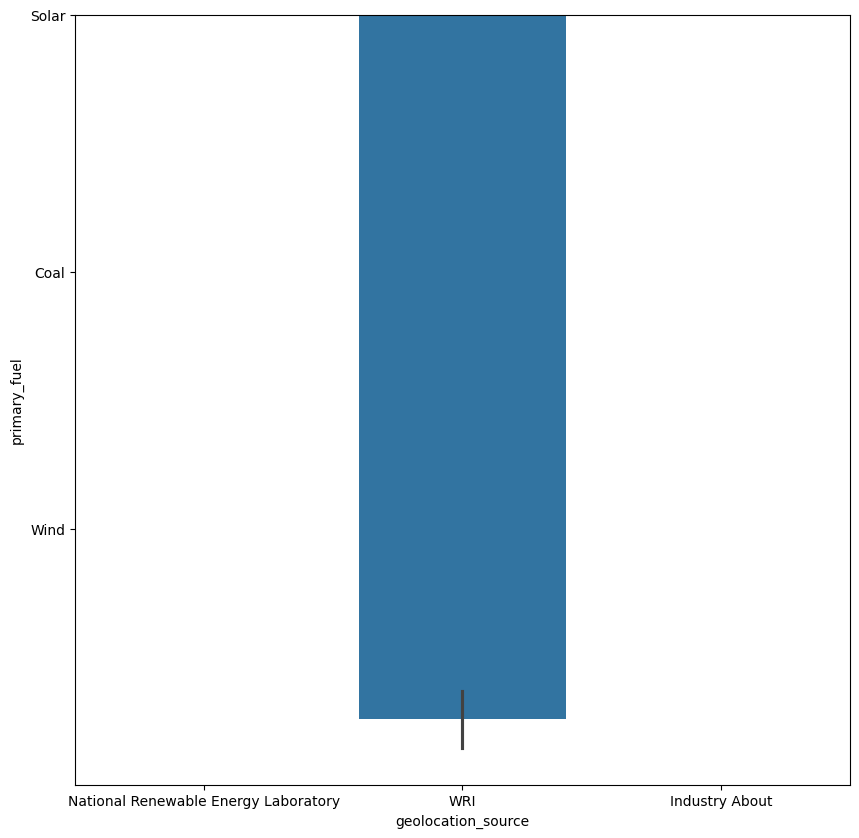

In [76]:
plt.figure(figsize=(10,10))
sns.barplot(powerplantdf,x='geolocation_source',y='primary_fuel')
plt.show()

The result from the above plot shows that the geolocation_source of WRI have more usage of primary fuels (wind, coal, solar)

# Scatter plot to show the relationship between the columns commissioning_year and primary_fuel

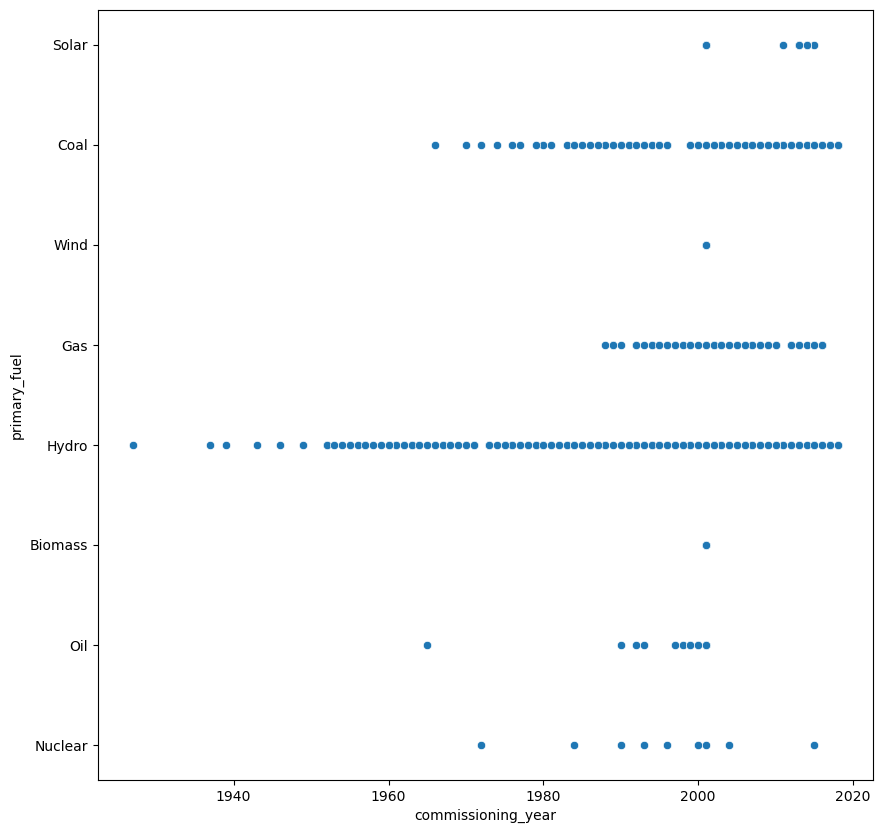

In [80]:
plt.figure(figsize=(10,10))
sns.scatterplot(powerplantdf,x='commissioning_year',y='primary_fuel')
plt.show()

The result from the above plot shows that the usage of the primary fuel Hydro is seen for the all the years from 1940 to 2020

# Scatter plot shows the relationship between the electricity generated gigawatts hours for 2014 and electrical generated in capacity mega watt for each primary fuel

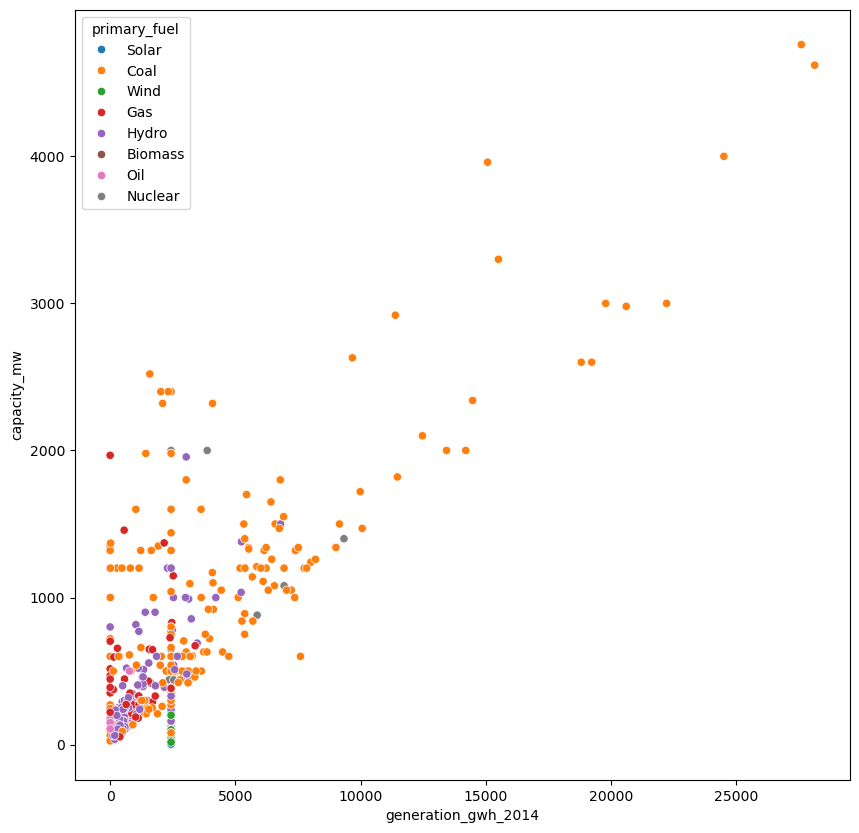

In [84]:
plt.figure(figsize=(10,10))
sns.scatterplot(powerplantdf,x='generation_gwh_2014',y='capacity_mw',hue='primary_fuel')
plt.show()

The above plot shows the usage of the primary fuel coal is generated more in 2014 with maximum capacity mega watt

# Scatter plot shows the relationship between the electricity generated gigawatts hours for 2015 and electrical generated in capacity mega watt for each primary fuel

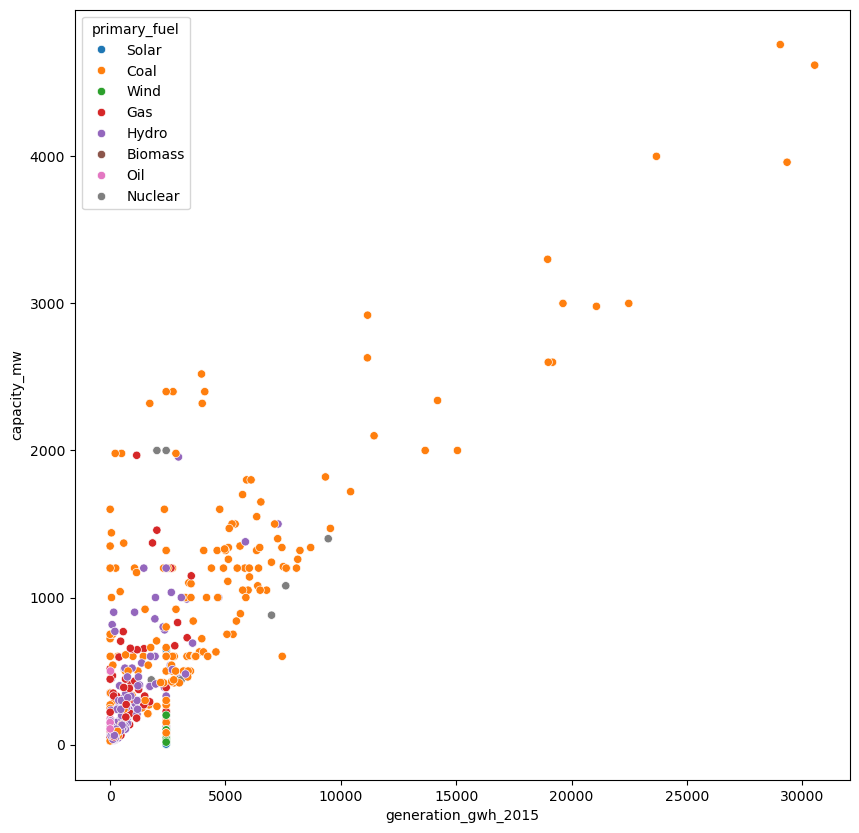

In [88]:
plt.figure(figsize=(10,10))
sns.scatterplot(powerplantdf,x='generation_gwh_2015',y='capacity_mw',hue='primary_fuel')
plt.show()

The above plot shows the usage of the primary fuel coal is generated more in 2015 with maximum capacity mega watt

# Scatter plot shows the relationship between the electricity generated gigawatts hours for 2016 and electrical generated in capacity mega watt for each primary fuel

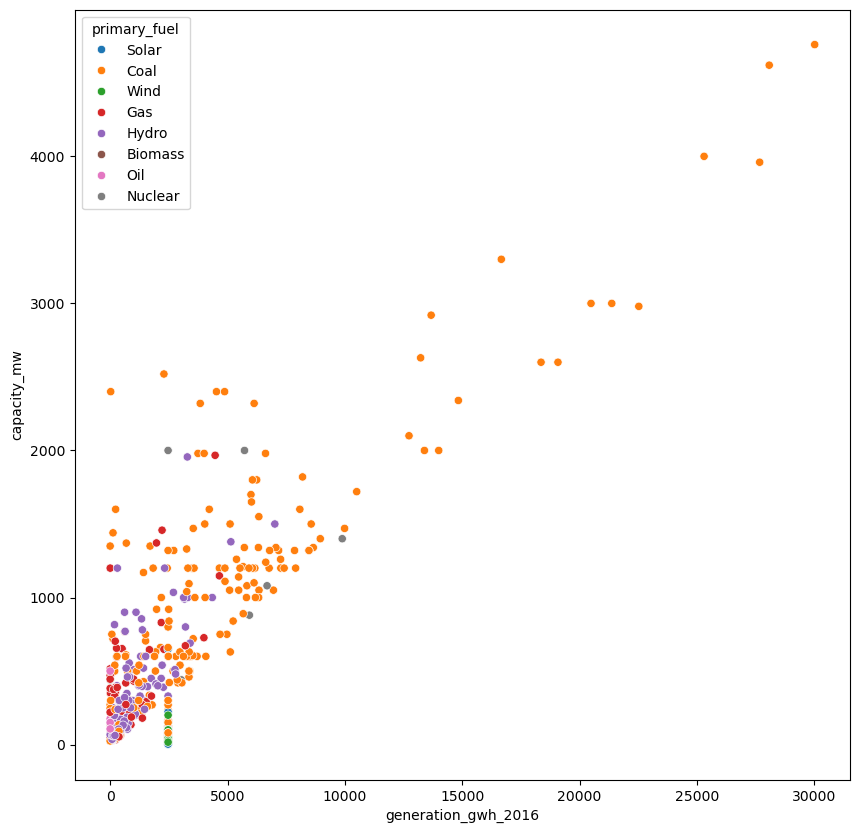

In [92]:
plt.figure(figsize=(10,10))
sns.scatterplot(powerplantdf,x='generation_gwh_2016',y='capacity_mw',hue='primary_fuel')
plt.show()

The above plot shows the usage of the primary fuel coal is generated more in 2016 with maximum capacity mega watt

# Scatter plot shows the relationship between the electricity generated gigawatts hours for 2017 and electrical generated in capacity mega watt for each primary fuel

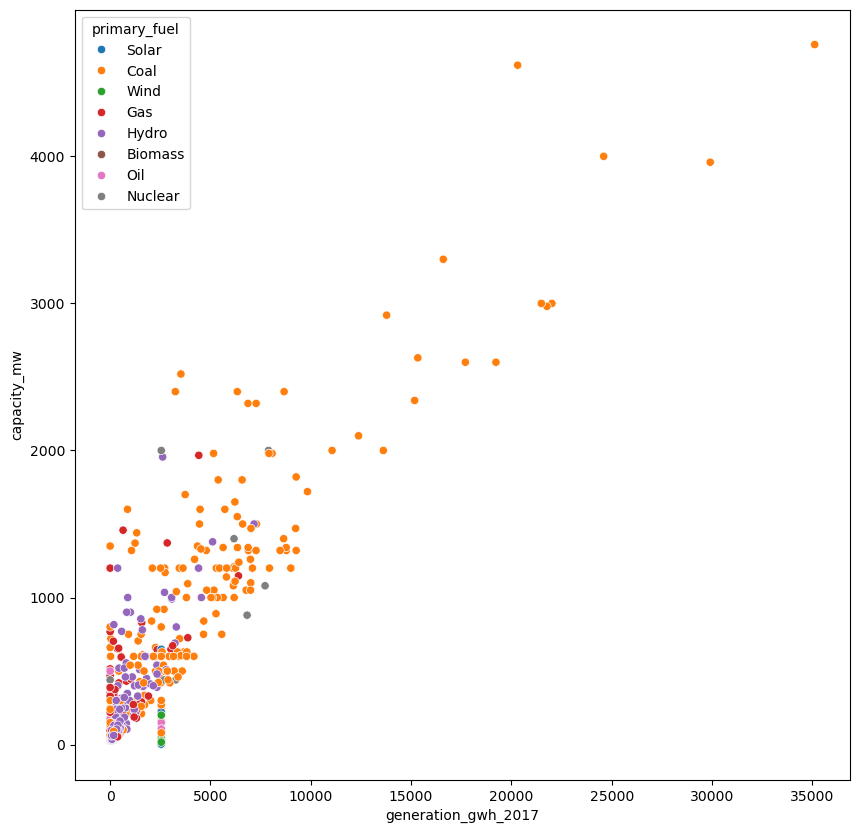

In [96]:
plt.figure(figsize=(10,10))
sns.scatterplot(powerplantdf,x='generation_gwh_2017',y='capacity_mw',hue='primary_fuel')
plt.show()

The above plot shows the usage of the primary fuel coal is generated more in 2017 with maximum capacity mega watt

# Scatter plot shows the relationship between the electricity generated gigawatts hours for 2018 and electrical generated in capacity mega watt for each primary fuel

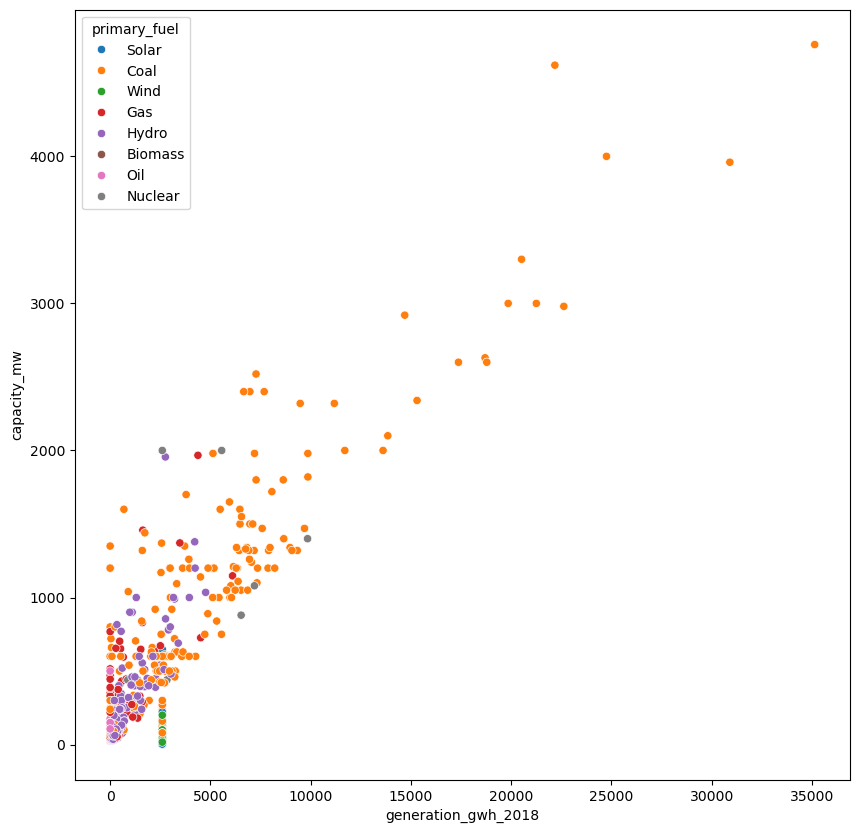

In [100]:
plt.figure(figsize=(10,10))
sns.scatterplot(powerplantdf,x='generation_gwh_2018',y='capacity_mw',hue='primary_fuel')
plt.show()

The above plot shows the usage of the primary fuel coal is generated more in 2018 with maximum capacity mega watt

# Stripplot to shows the relationship between the columns year of capacity data and capacity mega watt for each primary fuel

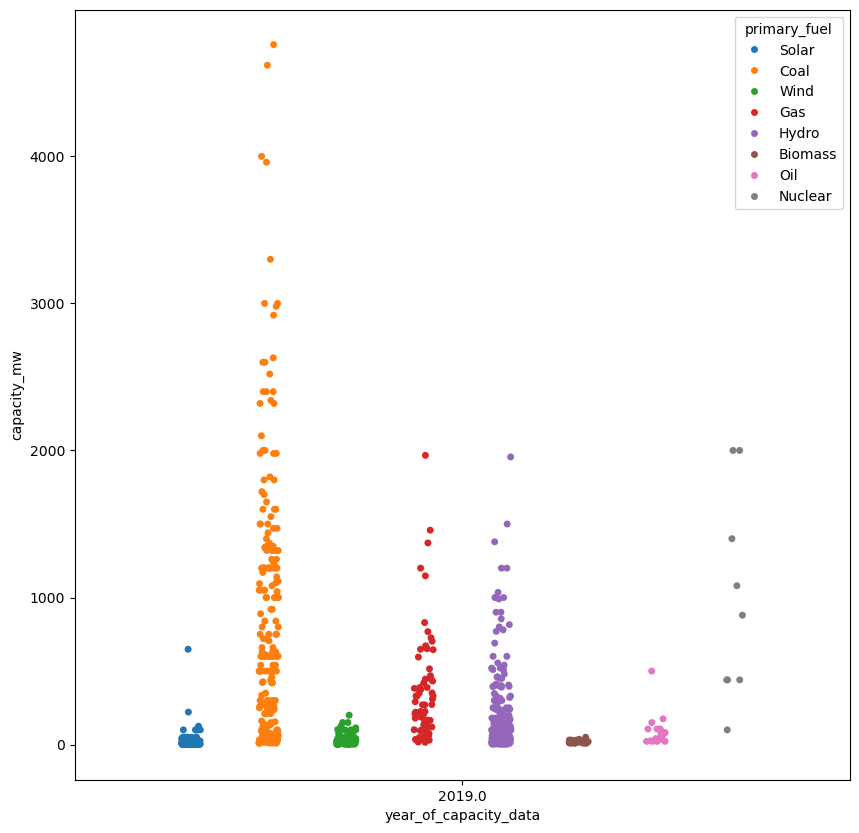

In [104]:
plt.figure(figsize=(10,10))
sns.stripplot(powerplantdf,x='year_of_capacity_data',y='capacity_mw',hue='primary_fuel',dodge=True)
plt.show()

It is clear from the above plot that the primary fuel coal have the higher capacity mega watt for year of capacity data 2019

# Stripplot to shows the relationship between the columns year of capacity data and capacity mega watt for each other fuel1

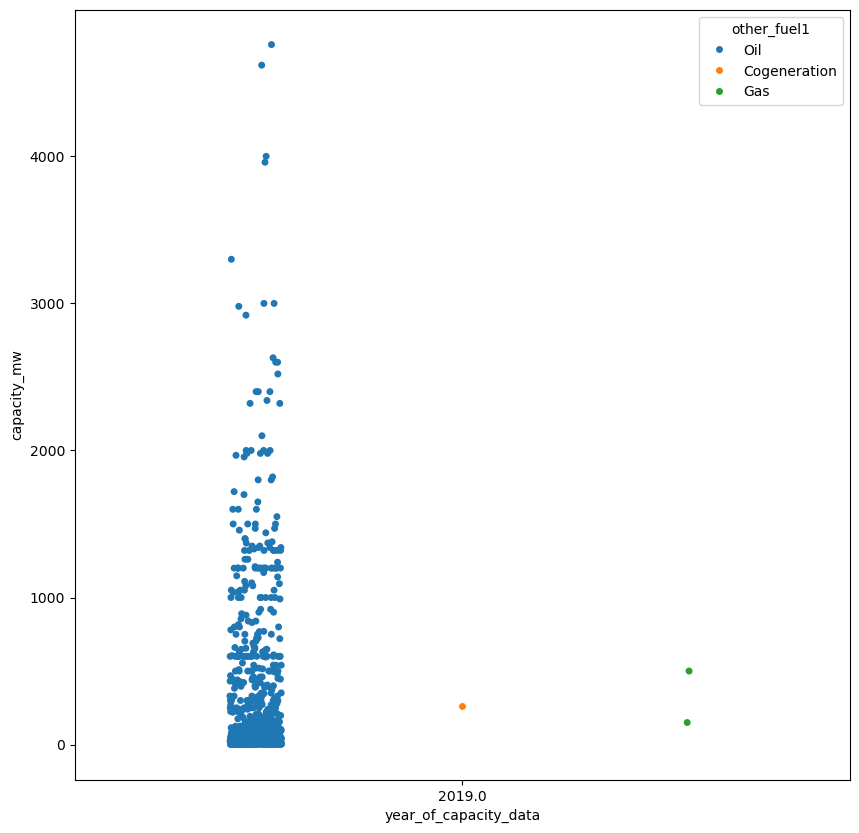

In [108]:
plt.figure(figsize=(10,10))
sns.stripplot(powerplantdf,x='year_of_capacity_data',y='capacity_mw',hue='other_fuel1',dodge=True)
plt.show()

It is clear from the above plot that the other fuel oil have the higher capacity mega watt for year of capacity data 2019

# Stripplot to shows the relationship between the columns geolocation source and capacity mega watt for each primary fuel

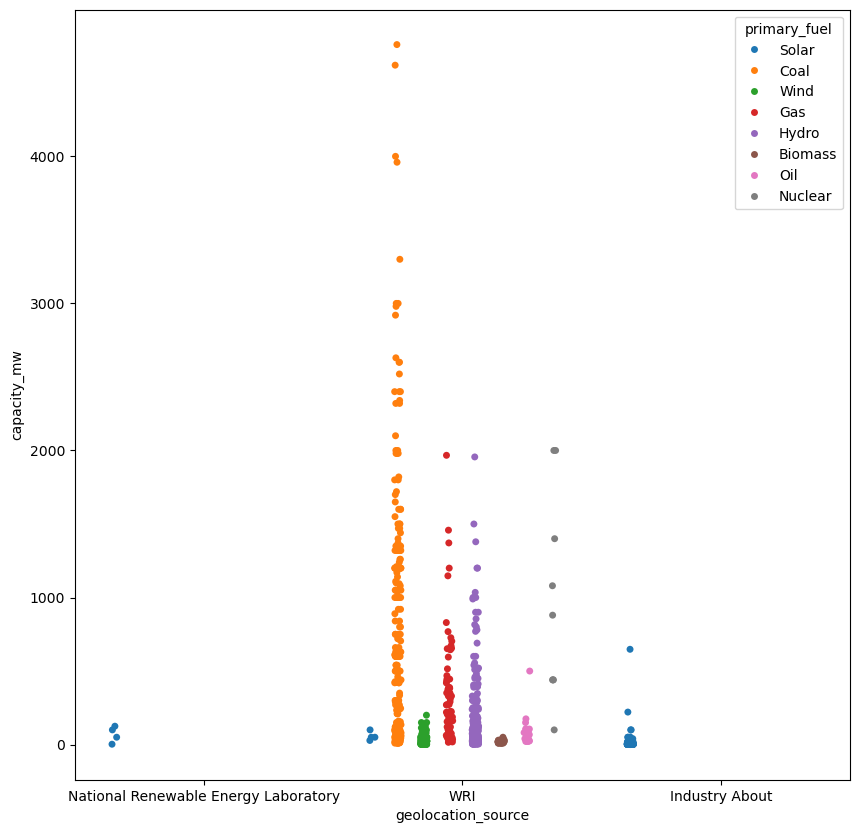

In [112]:
plt.figure(figsize=(10,10))
sns.stripplot(powerplantdf,x='geolocation_source',y='capacity_mw',hue='primary_fuel',dodge=True)
plt.show()

It is clear from the above plot that the WRI geolocation source have higher usage of all primary fuels and particularly the usage of coal is more for WRI location.

# Countplot to show the relationship between powerplants identifier and primary fuel

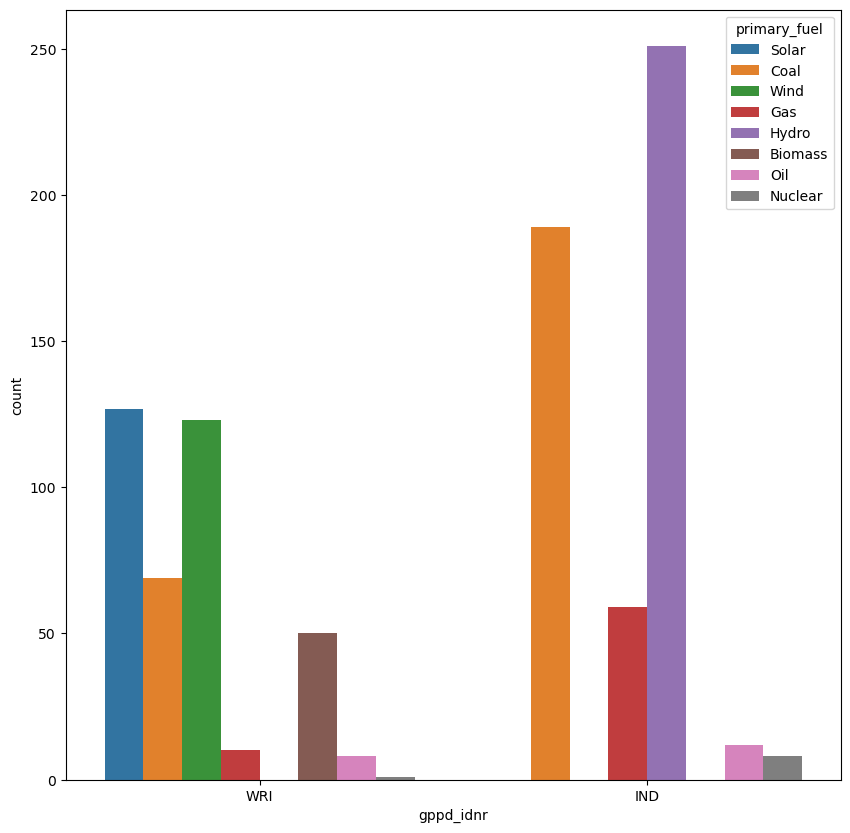

In [116]:
plt.figure(figsize=(10,10))
sns.countplot(powerplantdf,x='gppd_idnr',hue='primary_fuel')
plt.show()

The above plot shows that the identifier for WRI powerplants have higher count for the solar fuel and the identifier for IND powerplants have the higher count for the fuel type Hydro.

# Stripplot to show the relationship between capacity mega watt and primary fuel for each powerplant identifier

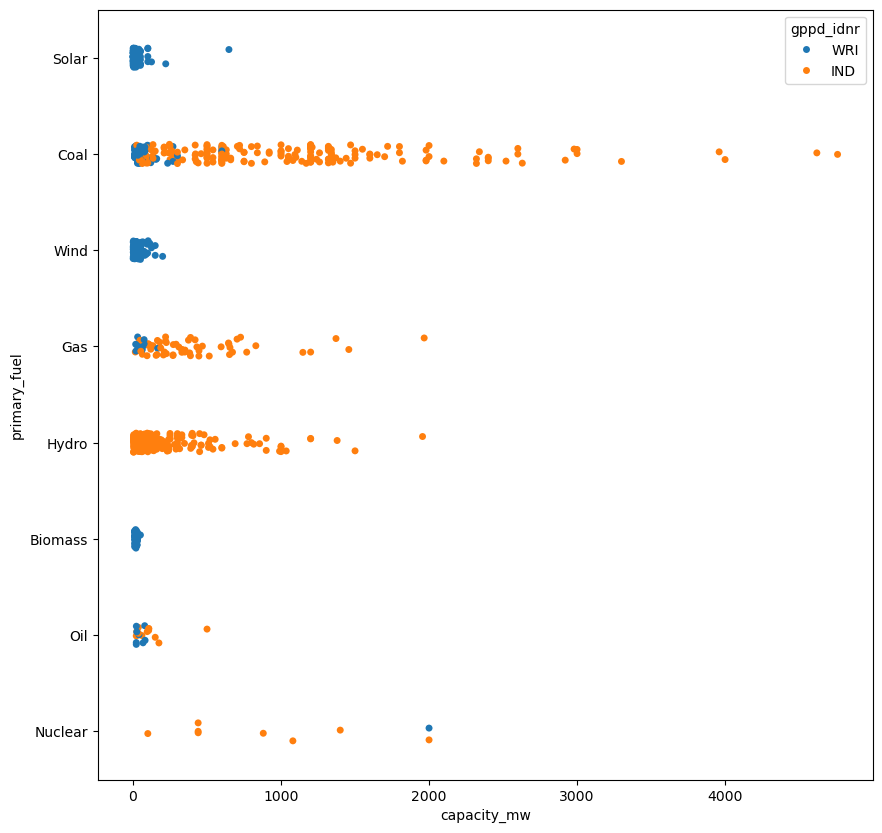

In [120]:
plt.figure(figsize=(10,10))
sns.stripplot(powerplantdf,x='capacity_mw',y='primary_fuel',hue='gppd_idnr')
plt.show()

It is clear from the above plot that the powerplant identifier type IND have more capacity mega watt usage for the primary fuel type coal.

# Apply Label Encoder to encode the categorical columns in the dataset

In [124]:
columns_to_encode=['country','name','primary_fuel','other_fuel1','owner','source','geolocation_source','generation_data_source']

le=LabelEncoder()
powerplantdf[columns_to_encode]=powerplantdf[columns_to_encode].apply(le.fit_transform)

In [126]:
powerplantdf=powerplantdf.drop(columns=['country','gppd_idnr','year_of_capacity_data','generation_data_source'],axis=1)
powerplantdf.head()

name  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0     0          2.5   28.1839    73.2407             6            2   
1     1         98.0   24.7663    74.6090             1            2   
2     2         39.2   21.9038    69.3732             7            2   
3     3        135.0   23.8712    91.3602             2            2   
4     4       1800.0   21.9603    82.4091             1            2   

   commissioning_year  owner  source  geolocation_source  generation_gwh_2014  \
0              2011.0    229     109                   1          2431.823590   
1              2001.0    258     174                   2          2431.823590   
2              2001.0      2      21                   2          2431.823590   
3              2004.0      5      22                   2           617.789264   
4              2015.0      5      22                   2          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0          2428.226946          2467.936859          2547.759305   
1          2428.226946          2467.936859          2547.759305   
2          2428.226946          2467.936859          2547.759305   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  
0          2600.804099  
1          2600.804099  
2          2600.804099  
3           626.239128  
4          7279.000000

# Heatmap to show the correlation between the features in the dataset

In [129]:
powerplantcorr=powerplantdf.corr()

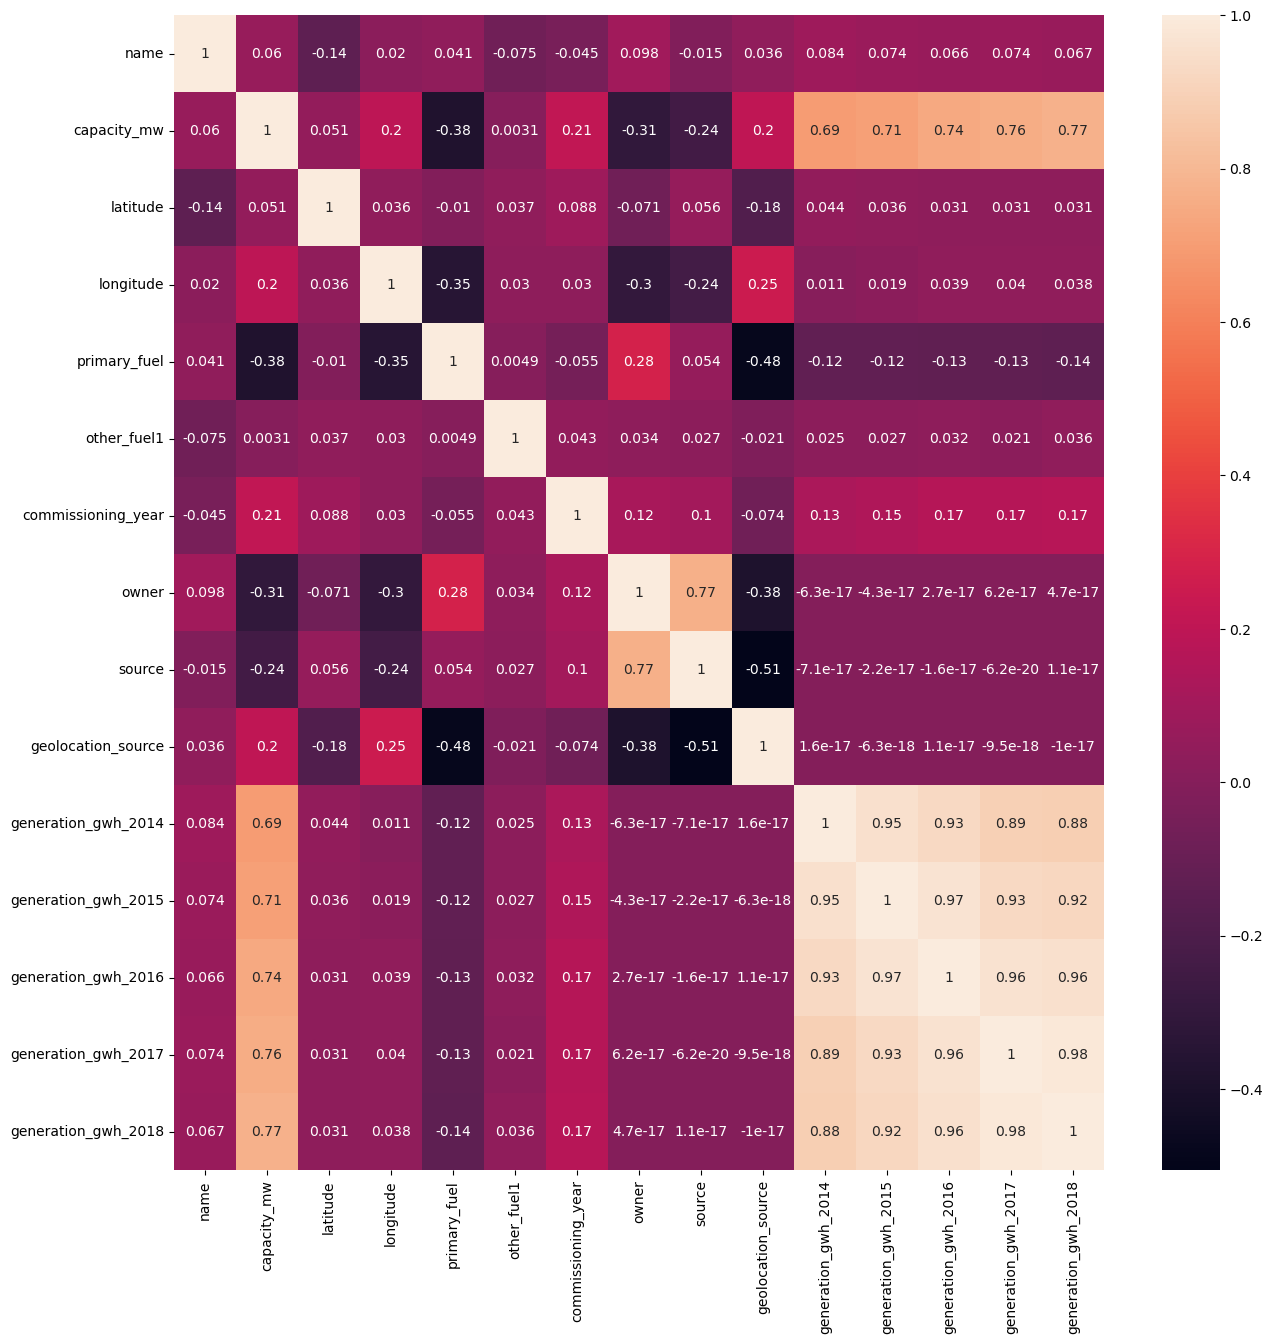

In [131]:
plt.figure(figsize=(15,15))
sns.heatmap(powerplantcorr,annot=True)
plt.show()

The observation from the above plot are:

1, The columns generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 are positively correlated with each other.

2, The columns owner and source are positively correlated with each other.

3, The columns primary_fuel and longitude are negatively correlated with each other.

In [134]:
powerplantdf.shape

(907, 15)

# check for skewness in the dataset using seaborn distplot

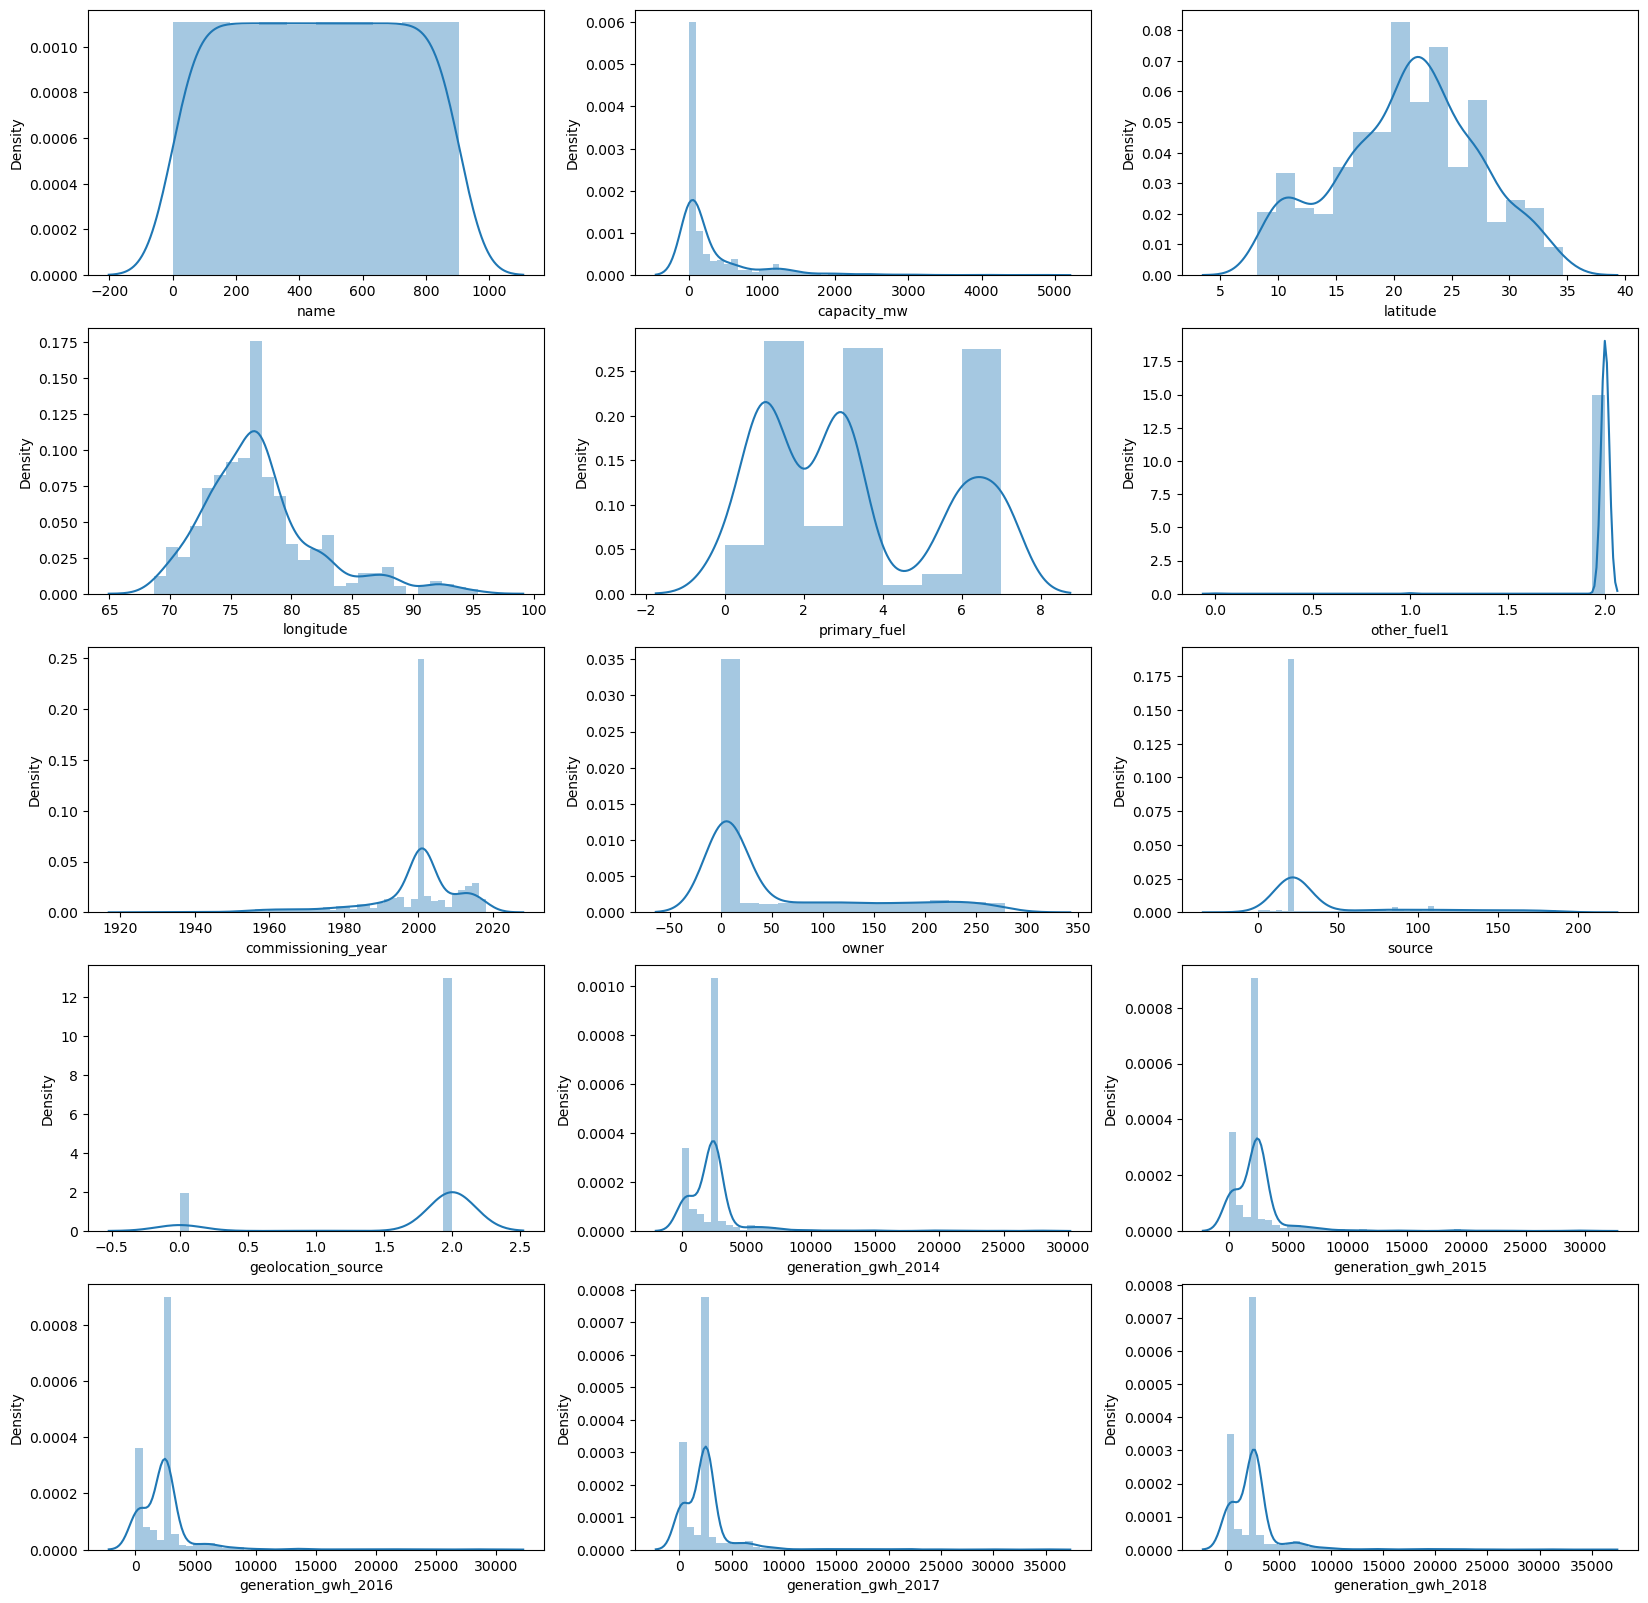

In [137]:
p=1
plt.figure(figsize=(20,20))
for i in powerplantdf:
    if p<=15:
        plt.subplot(5,3,p)
        sns.distplot(powerplantdf[i])
    p=p+1
plt.show()

# Check for the skewness in the dataset using skew() method

In [140]:
powerplantdf.skew()

name                    0.000000
capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.719575
owner                   1.364406
source                  1.827373
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

# Apply PowerTransformer to remove the skewness from the dataset

In [143]:
columns_to_transform=['capacity_mw','longitude','other_fuel1','commissioning_year','owner','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
pt=PowerTransformer()
powerplantdf[columns_to_transform]=pt.fit_transform(powerplantdf[columns_to_transform])

In [145]:
powerplantdf.skew()

name                    0.000000
capacity_mw             0.022164
latitude               -0.149698
longitude               0.002926
primary_fuel            0.472251
other_fuel1           -17.330022
commissioning_year     -0.525056
owner                   0.467077
source                 -0.214066
geolocation_source     -2.132728
generation_gwh_2014     0.123226
generation_gwh_2015     0.074582
generation_gwh_2016     0.041821
generation_gwh_2017     0.018337
generation_gwh_2018     0.000783
dtype: float64

# Skewness is removed from the dataset

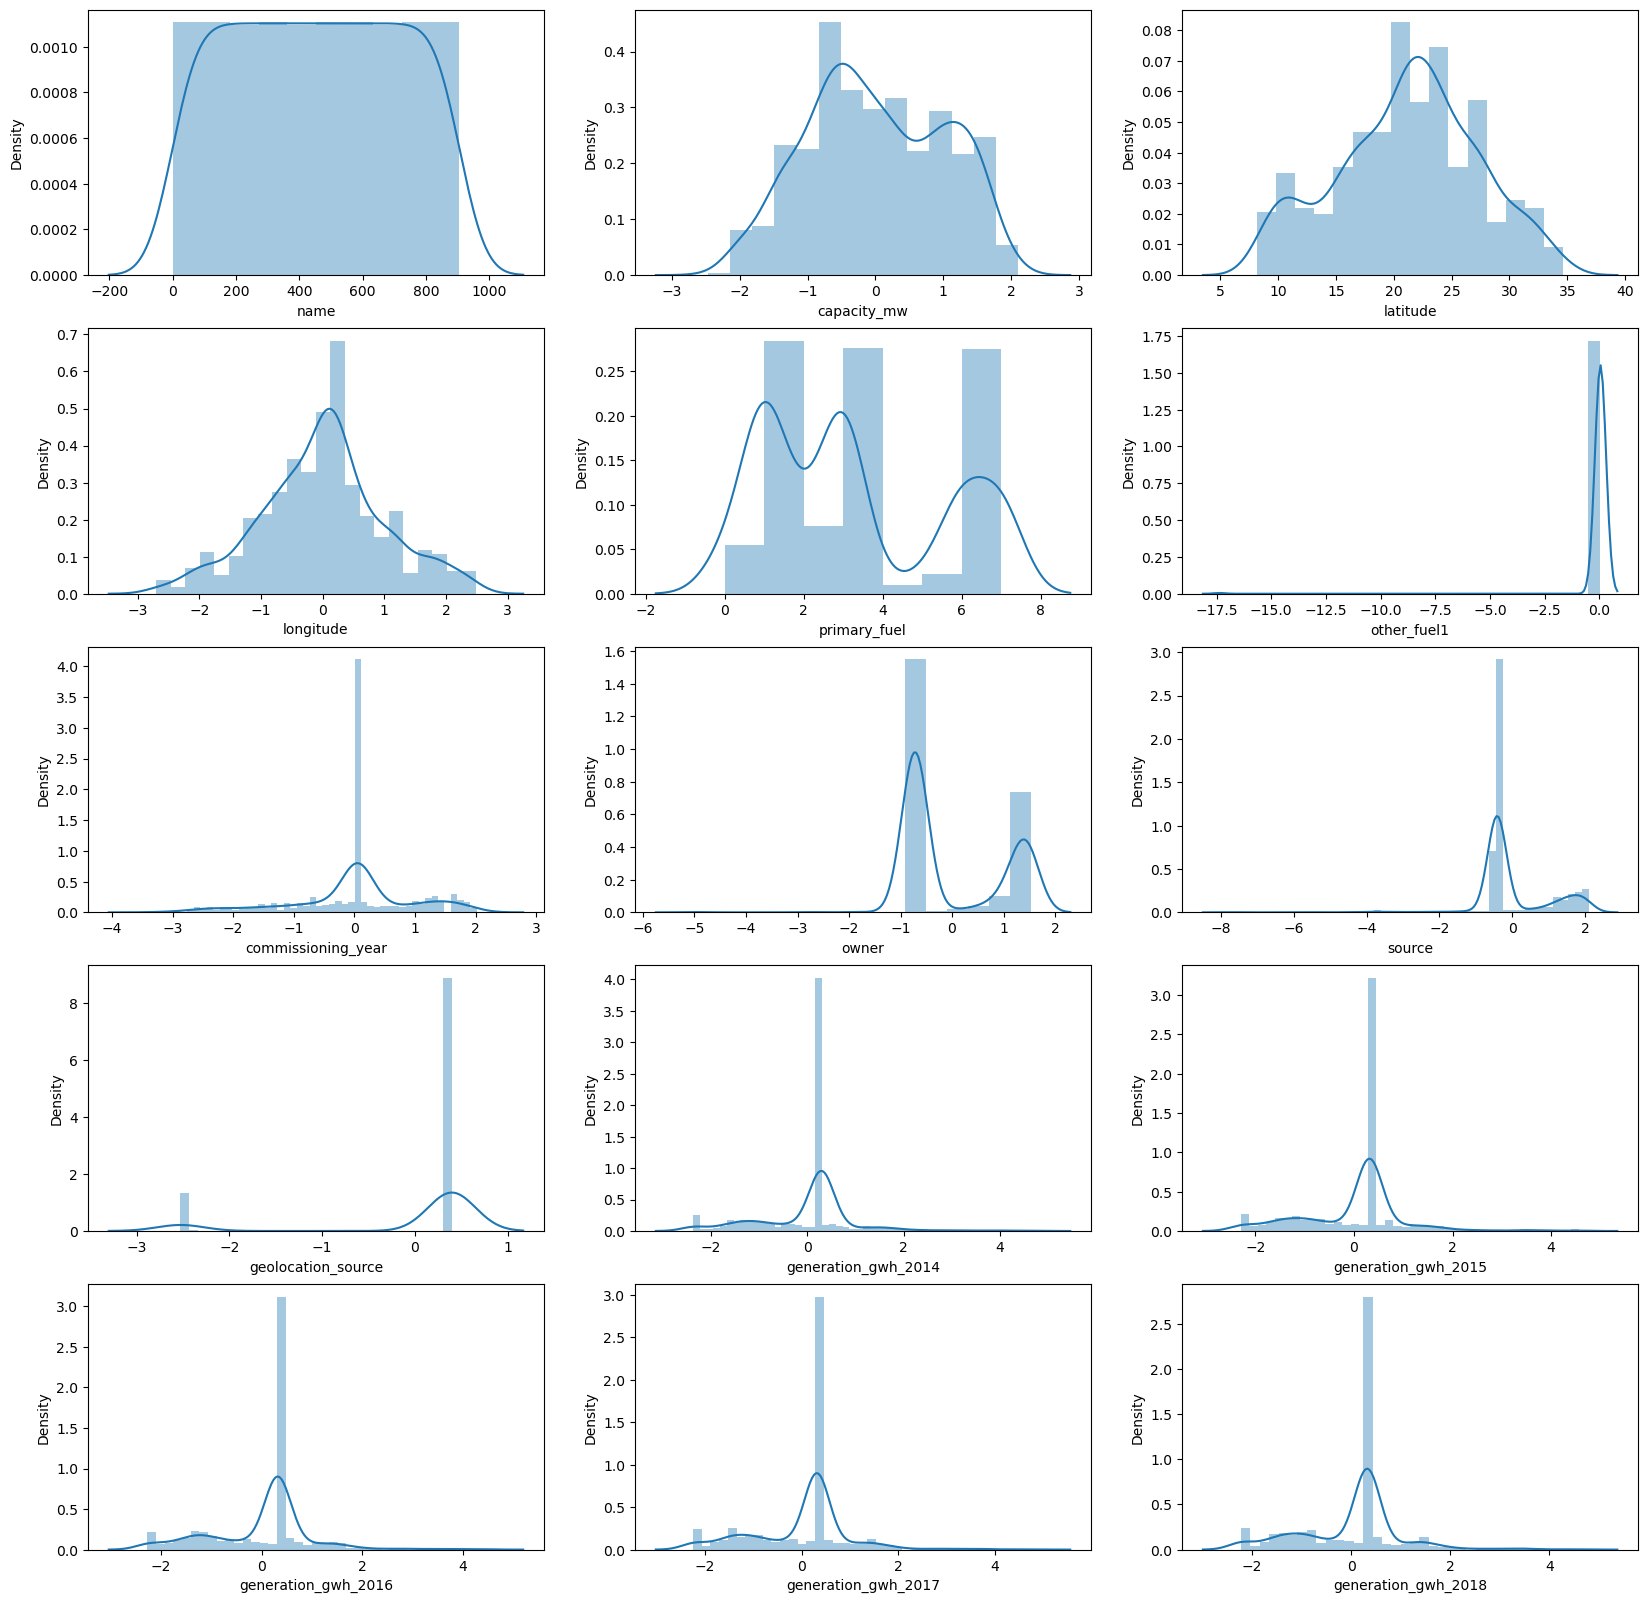

In [148]:
p=1
plt.figure(figsize=(20,20))
for i in powerplantdf:
    if p<=15:
        plt.subplot(5,3,p)
        sns.distplot(powerplantdf[i])
    p=p+1
plt.show()

# Check for the outliers in the dataset using boxplot

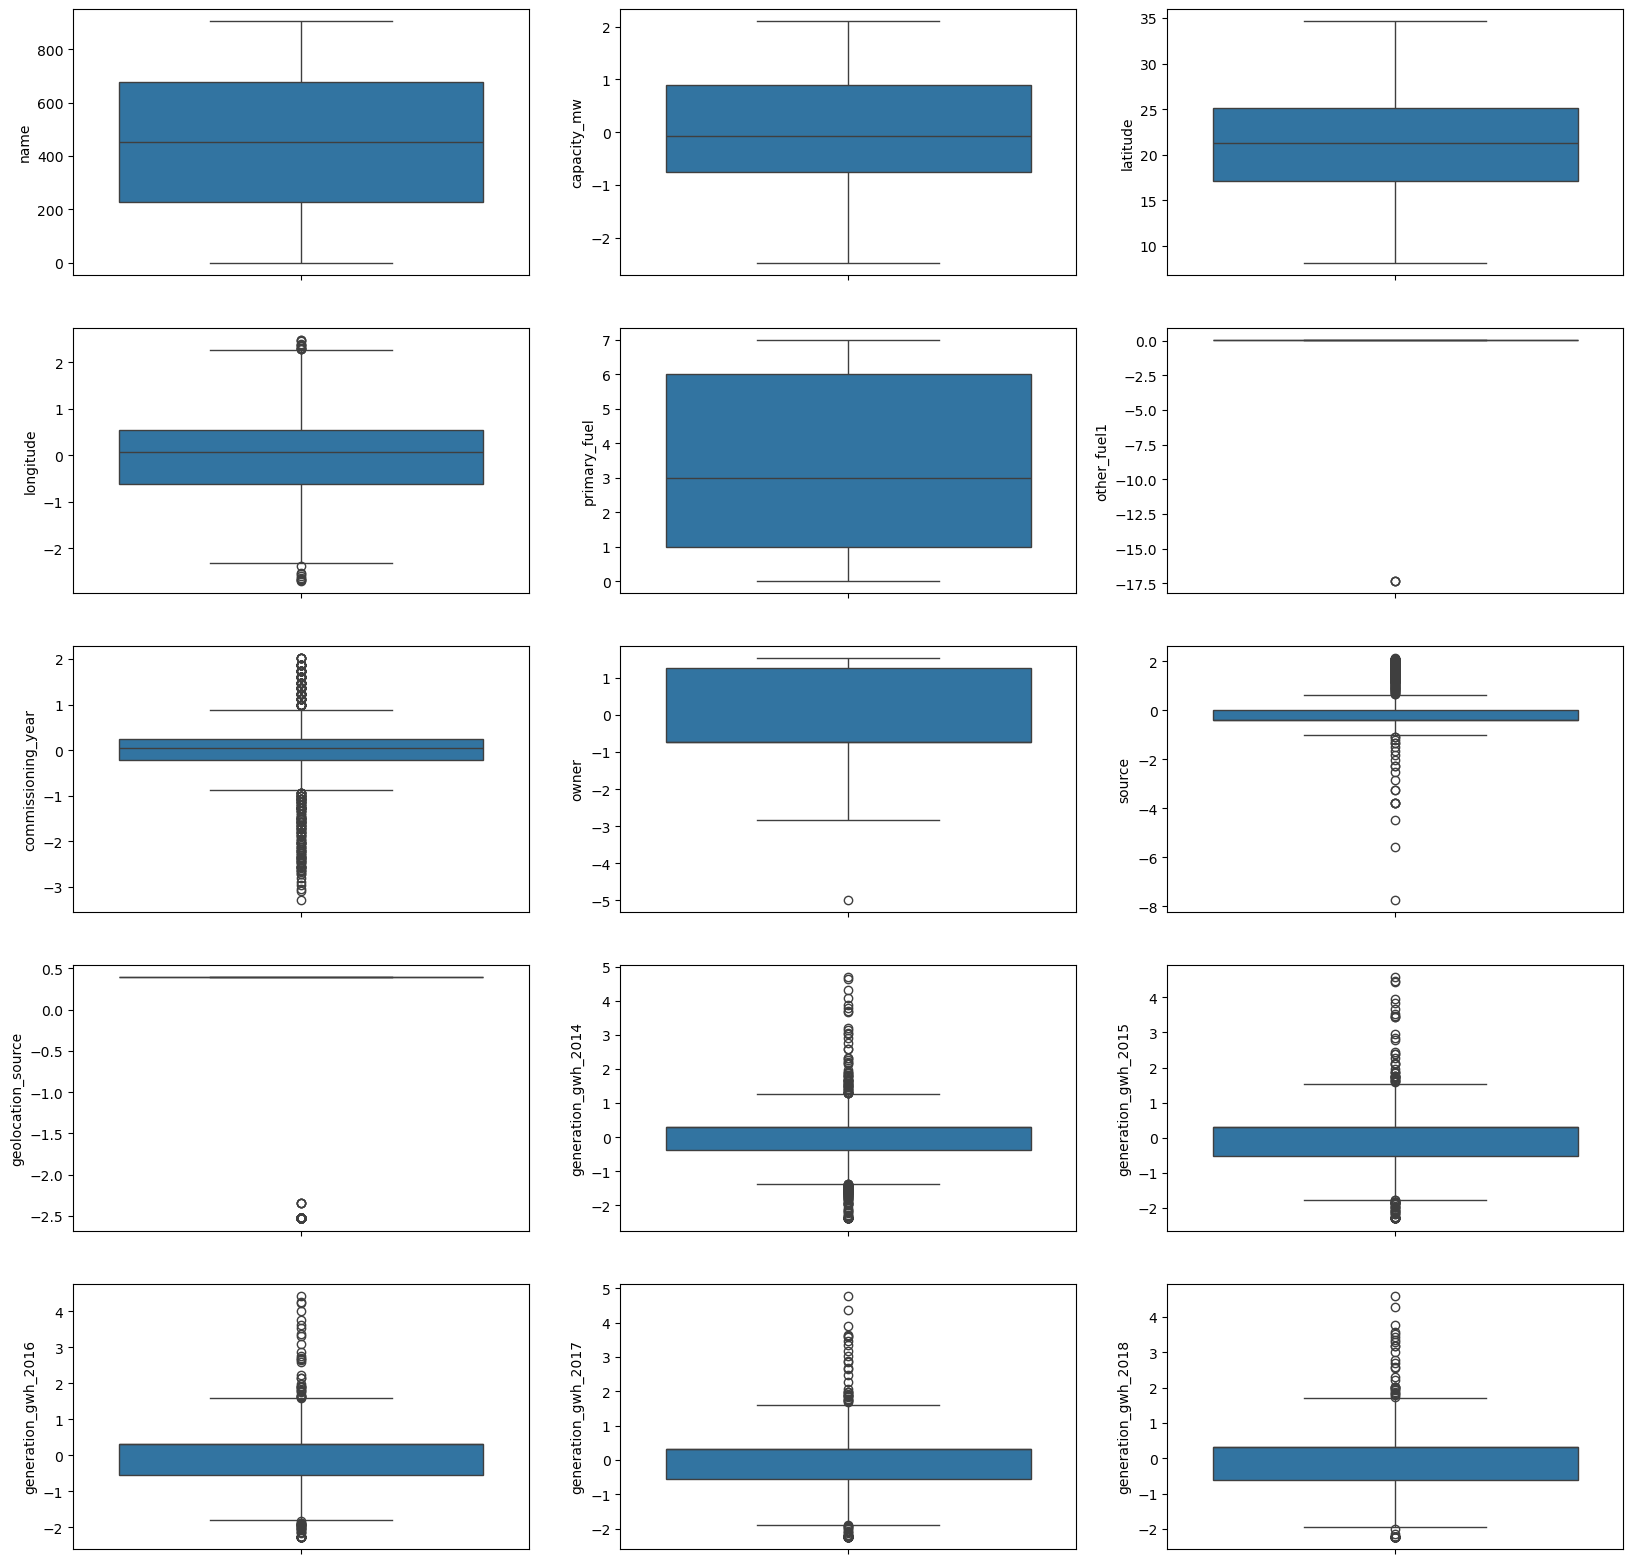

In [151]:
p=1
plt.figure(figsize=(20,20))
for i in powerplantdf:
    if p<=15:
        plt.subplot(5,3,p)
        sns.boxplot(powerplantdf[i])
    p=p+1
plt.show()

# Detect and remove outliers in the dataset using zscore

In [154]:
z=np.abs(zscore(powerplantdf))
z

name  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0    1.730142     1.695767  1.149805   0.952545      1.225688     0.057607   
1    1.726323     0.193694  0.587311   0.544976      0.967877     0.057607   
2    1.722504     0.292337  0.116179   2.379864      1.664401     0.057607   
3    1.718684     0.360998  0.439989   2.174468      0.529164     0.057607   
4    1.714865     1.649503  0.125479   1.117231      0.967877     0.057607   
..        ...          ...       ...        ...           ...          ...   
902  1.714865     1.593509  0.806975   0.153591      0.967877     0.057607   
903  1.718684     1.615576  1.366853   0.332870      1.225688     0.057607   
904  1.722504     0.522773  0.974707   0.280819      1.664401     0.057607   
905  1.726323     0.086915  0.518793   0.796374      0.967877     0.057607   
906  1.730142     0.755891  1.853834   0.180889      1.664401     0.057607   

     commissioning_year     owner    source  geolocation_source  \
0              1.113530  1.490514  1.582861            2.345400   
1              0.053562  1.512380  2.036658            0.396062   
2              0.053562  1.899629  0.471879            0.396062   
3              0.346488  0.719375  0.403248            0.396062   
4              1.610143  0.719375  0.403248            0.396062   
..                  ...       ...       ...                 ...   
902            1.741534  0.719375  0.403248            0.396062   
903            0.053562  1.330190  1.211010            2.530510   
904            0.053562  0.719375  0.471879            0.396062   
905            0.053562  1.264218  0.904767            0.396062   
906            0.053562  1.525981  0.471879            0.396062   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0               0.287071             0.311796             0.315787   
1               0.287071             0.311796             0.315787   
2               0.287071             0.311796             0.315787   
3               0.864800             0.579716             0.542819   
4               0.537628             1.385476             1.427655   
..                   ...                  ...                  ...   
902             0.287071             2.251373             1.270233   
903             0.287071             0.311796             0.315787   
904             0.287071             0.311796             0.315787   
905             0.287071             0.311796             0.315787   
906             0.287071             0.311796             0.315787   

     generation_gwh_2017  generation_gwh_2018  
0               0.312925             0.321938  
1               0.312925             0.321938  
2               0.312925             0.321938  
3               0.750910             0.771699  
4               1.180690             1.552482  
..                   ...                  ...  
902             0.581036             0.716996  
903             0.312925             0.321938  
904             0.312925             0.321938  
905             0.312925             0.321938  
906             0.312925             0.321938  

[907 rows x 15 columns]

In [156]:
np.where(z>=3)

(array([ 15, 112, 130, 137, 308, 364, 364, 364, 364, 364, 387, 393, 404,
        415, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 538, 648,
        648, 648, 648, 648, 657, 657, 657, 657, 657, 695, 695, 695, 695,
        695, 709, 721, 726, 726, 726, 726, 726, 728, 786, 786, 786, 786,
        786, 808, 808, 808, 808, 808, 811, 813, 817, 880, 880, 880, 880,
        880, 888, 894, 894], dtype=int64),
 array([14,  8,  8,  8, 10, 10, 11, 12, 13, 14,  8,  8,  8,  8, 10, 11, 12,
        13, 14, 10, 11, 12, 13, 14,  6, 10, 11, 12, 13, 14, 10, 11, 12, 13,
        14, 10, 11, 12, 13, 14,  6, 10, 10, 11, 12, 13, 14,  6, 10, 11, 12,
        13, 14, 10, 11, 12, 13, 14,  5,  5,  5, 10, 11, 12, 13, 14,  8,  7,
         8], dtype=int64))

In [158]:
powerplant_df=powerplantdf[(z<=3).all(axis=1)]
powerplant_df.head()

name  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0     0    -1.695767   28.1839  -0.952545             6     0.057607   
1     1     0.193694   24.7663  -0.544976             1     0.057607   
2     2    -0.292337   21.9038  -2.379864             7     0.057607   
3     3     0.360998   23.8712   2.174468             2     0.057607   
4     4     1.649503   21.9603   1.117231             1     0.057607   

   commissioning_year     owner    source  geolocation_source  \
0            1.113530  1.490514  1.582861           -2.345400   
1            0.053562  1.512380  2.036658            0.396062   
2            0.053562 -1.899629 -0.471879            0.396062   
3            0.346488 -0.719375 -0.403248            0.396062   
4            1.610143 -0.719375 -0.403248            0.396062   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0             0.287071             0.311796             0.315787   
1             0.287071             0.311796             0.315787   
2             0.287071             0.311796             0.315787   
3            -0.864800            -0.579716            -0.542819   
4             0.537628             1.385476             1.427655   

   generation_gwh_2017  generation_gwh_2018  
0             0.312925             0.321938  
1             0.312925             0.321938  
2             0.312925             0.321938  
3            -0.750910            -0.771699  
4             1.180690             1.552482

In [160]:
print("Percentage of data loss",((powerplantdf.shape[0]-powerplant_df.shape[0])/powerplantdf.shape[0])*100)

Percentage of data loss 3.0871003307607494


In [162]:
powerplantdf.shape

(907, 15)

In [164]:
powerplant_df.shape

(879, 15)

# Pairplot to show the relationship between each features in dataset

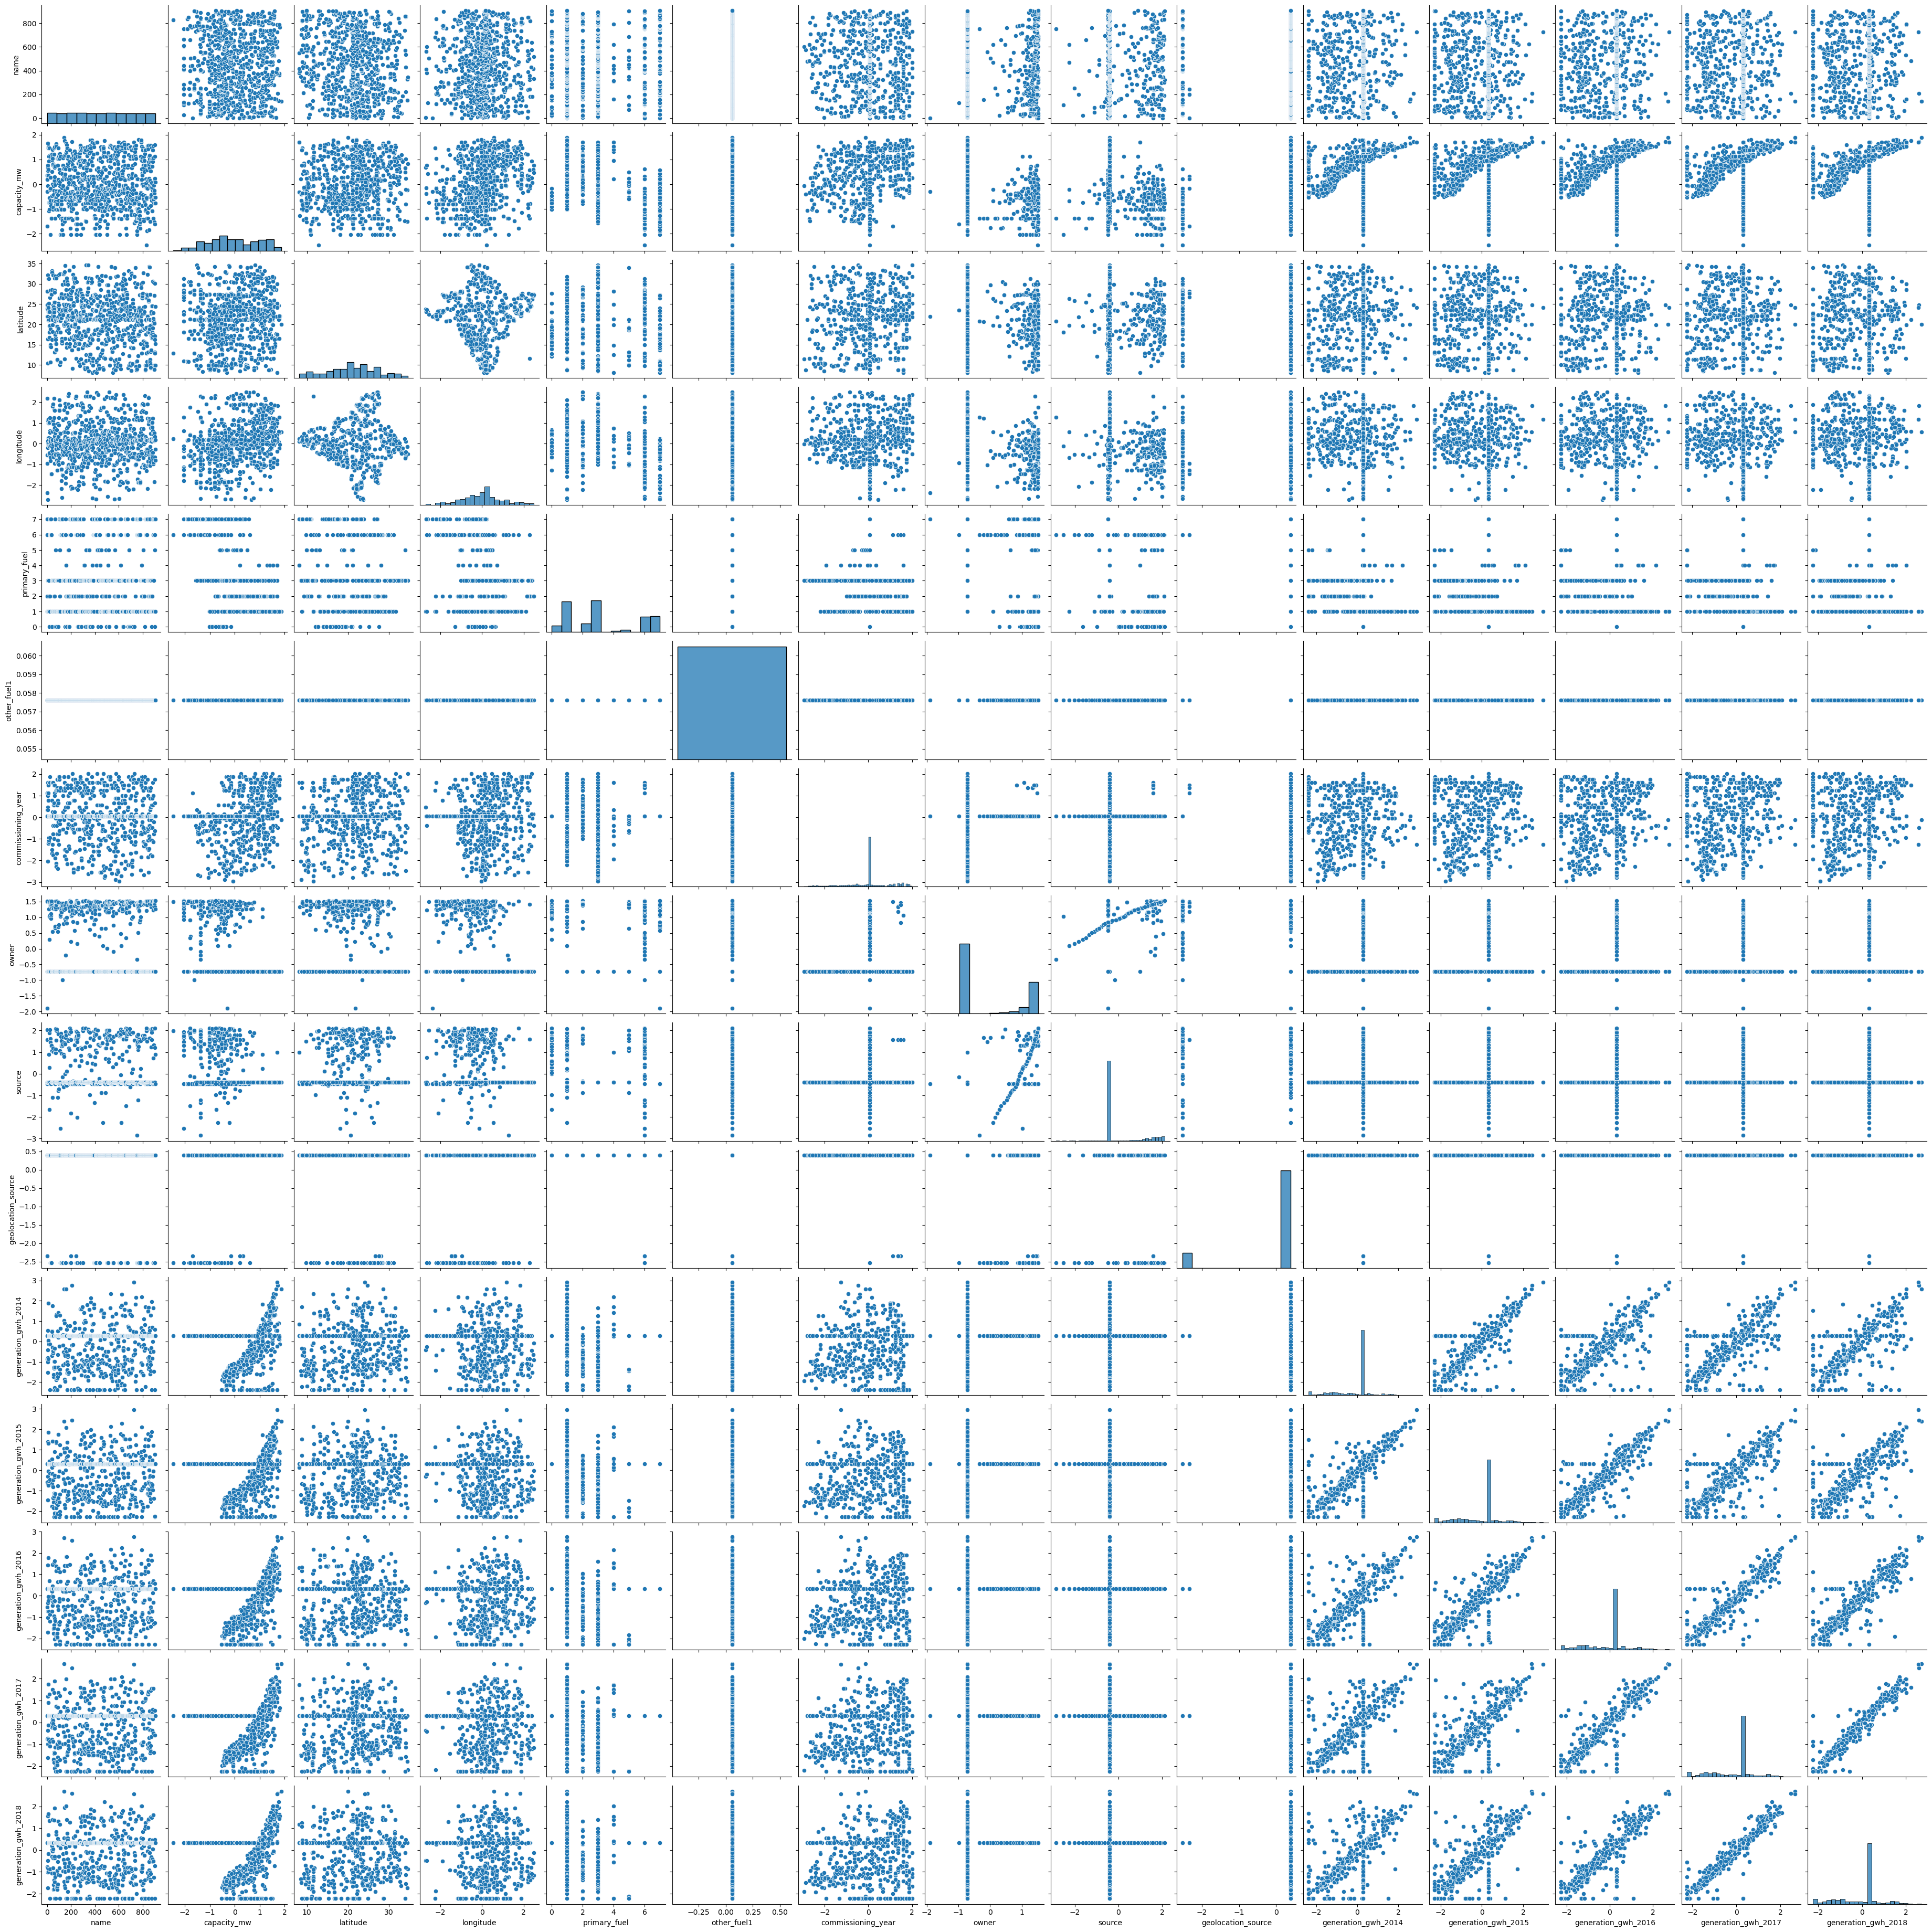

In [122]:
sns.pairplot(powerplant_df);

# Split the data as x(input) and y(label/output)

In [168]:
x=powerplant_df.drop(columns='primary_fuel',axis=1)
x.head()

name  capacity_mw  latitude  longitude  other_fuel1  commissioning_year  \
0     0    -1.695767   28.1839  -0.952545     0.057607            1.113530   
1     1     0.193694   24.7663  -0.544976     0.057607            0.053562   
2     2    -0.292337   21.9038  -2.379864     0.057607            0.053562   
3     3     0.360998   23.8712   2.174468     0.057607            0.346488   
4     4     1.649503   21.9603   1.117231     0.057607            1.610143   

      owner    source  geolocation_source  generation_gwh_2014  \
0  1.490514  1.582861           -2.345400             0.287071   
1  1.512380  2.036658            0.396062             0.287071   
2 -1.899629 -0.471879            0.396062             0.287071   
3 -0.719375 -0.403248            0.396062            -0.864800   
4 -0.719375 -0.403248            0.396062             0.537628   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             0.311796             0.315787             0.312925   
1             0.311796             0.315787             0.312925   
2             0.311796             0.315787             0.312925   
3            -0.579716            -0.542819            -0.750910   
4             1.385476             1.427655             1.180690   

   generation_gwh_2018  
0             0.321938  
1             0.321938  
2             0.321938  
3            -0.771699  
4             1.552482

In [170]:
y=powerplant_df['primary_fuel']
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

# Check for the multicollinearity in the dataset

In [173]:
def calc_vif(x):
    df=pd.DataFrame()
    df['columns']=x.columns
    df['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return df

In [175]:
calc_vif(x)

columns        VIF
0                  name   1.028223
1           capacity_mw   1.953292
2              latitude   1.120115
3             longitude   1.222361
4           other_fuel1  19.024452
5    commissioning_year   1.161117
6                 owner   3.081997
7                source   2.325918
8    geolocation_source   1.720395
9   generation_gwh_2014   4.061837
10  generation_gwh_2015   7.201402
11  generation_gwh_2016  10.595960
12  generation_gwh_2017  10.761154
13  generation_gwh_2018  10.939621

In [177]:
x=x.drop(columns='other_fuel1',axis=1)

In [179]:
calc_vif(x)

columns        VIF
0                  name   3.068615
1           capacity_mw   1.943977
2              latitude   3.087647
3             longitude   1.222038
4    commissioning_year   1.160784
5                 owner   3.055113
6                source   2.333121
7    geolocation_source   1.653431
8   generation_gwh_2014   4.064344
9   generation_gwh_2015   7.218191
10  generation_gwh_2016  10.606350
11  generation_gwh_2017  10.794300
12  generation_gwh_2018  10.964807

In [181]:
y.value_counts()

primary_fuel
3    248
1    240
7    123
6    122
2     69
0     50
5     18
4      9
Name: count, dtype: int64

# Balance the dataset using SMOTE over sampling technique

In [184]:
smt=SMOTE()
x_transform,y_transform=smt.fit_resample(x,y)

In [185]:
y_transform.value_counts()

primary_fuel
6    248
1    248
7    248
2    248
3    248
0    248
5    248
4    248
Name: count, dtype: int64

# Apply standardScaler method to standardize the data

In [189]:
sc=StandardScaler()
x_scales=sc.fit_transform(x_transform)
x_scaled=pd.DataFrame(x_scales,columns=x_transform.columns)
x_scaled.head()

name  capacity_mw  latitude  longitude  commissioning_year     owner  \
0 -1.837022    -1.775341  1.470200  -0.913124            1.475562  1.355309   
1 -1.832877     0.224924  0.873537  -0.436576            0.069773  1.377679   
2 -1.828731    -0.289609  0.373787  -2.582011            0.069773 -2.113086   
3 -1.824586     0.402040  0.717266   2.743121            0.458268 -0.905589   
4 -1.820440     1.766107  0.383651   1.506952            2.134199 -0.905589   

     source  geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0  1.490096           -2.506547             0.366001             0.420726   
1  1.982713            0.373229             0.366001             0.420726   
2 -0.740422            0.373229             0.366001             0.420726   
3 -0.665920            0.373229            -0.956271            -0.604416   
4 -0.665920            0.373229             0.653625             1.655341   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0             0.431557             0.393716             0.444272  
1             0.431557             0.393716             0.444272  
2             0.431557             0.393716             0.444272  
3            -0.492453            -0.791850            -0.771271  
4             1.628120             1.360776             1.811985

# Instantiate the classification models

In [192]:
dtc=DecisionTreeClassifier()
svc=SVC()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
bag=BaggingClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()
extra=ExtraTreesClassifier()


model_names=[(dtc,"DecisionTreeClassifier"),
             (svc,"SVC"),
             (knn,"KNeighborsClassifier"),
             (rfc,"RandomForestClassifier"),
             (bag,"BaggingClassifier"),
             (gbc,"GradientBoostingClassifier"),
             (ada,"AdaBoostClassifier"),
             (extra,"ExtraTreesClassifier")]

# Perform cross validation for each model to check for the best performing model

In [195]:
models=[dtc,svc,knn,rfc,bag,gbc,ada,extra]

for i in models:
    cvs=cross_val_score(i,x_scaled,y_transform,scoring='accuracy',cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"\n mean of the cross validation is",np.mean(cvs))

Cross validation score for DecisionTreeClassifier() is [0.86146096 0.86146096 0.88413098 0.89168766 0.88131313] 
 mean of the cross validation is 0.8760107370938606
Cross validation score for SVC() is [0.79345088 0.83375315 0.83375315 0.88916877 0.87626263] 
 mean of the cross validation is 0.8452777141694018
Cross validation score for KNeighborsClassifier() is [0.82115869 0.83375315 0.83627204 0.85390428 0.83080808] 
 mean of the cross validation is 0.8351792484034297
Cross validation score for RandomForestClassifier() is [0.88413098 0.85894207 0.93198992 0.92947103 0.92171717] 
 mean of the cross validation is 0.905250235350991
Cross validation score for BaggingClassifier() is [0.87405542 0.85894207 0.92443325 0.90680101 0.92171717] 
 mean of the cross validation is 0.8971897819504872
Cross validation score for GradientBoostingClassifier() is [0.86649874 0.87657431 0.92191436 0.90176322 0.8989899 ] 
 mean of the cross validation is 0.8931481057425641
Cross validation score for AdaBoo

# Check for the best random state and maximum accuracy for the best performing model in cross_val_score

In [198]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_transform,test_size=0.30,random_state=i)
    extra.fit(x_train,y_train)
    y_pred=extra.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accuracy score is",maxacc,"and random state is",maxrs)

Accuracy score is 0.9496644295302014 and random state is 152


In [200]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_transform,test_size=0.30,random_state=152)

In [202]:
x_train.shape

(1388, 13)

In [204]:
y_train.shape

(1388,)

In [206]:
x_test.shape

(596, 13)

In [208]:
y_test.shape

(596,)

# Build and train different classification models

In [211]:
model_metrics=[]

for model_data,model_name in model_names:
    model_data.fit(x_train,y_train)
    y_pred=model_data.predict(x_test)
    y_pred_train=model_data.predict(x_train)
    r2=r2_score(y_test,y_pred)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test=accuracy_score(y_test,y_pred)
    model_perf={"Model name":model_name,"R-Score(Test Data)":r2,"Accuracy Score(Training Data)":acc_train,"Accuracy Score(Test Data)":acc_test}
    model_metrics.append(model_perf)
model_df=pd.DataFrame(model_metrics)
model_df=model_df.sort_values(by='Accuracy Score(Test Data)',ascending=False)
model_df

Model name  R-Score(Test Data)  \
7        ExtraTreesClassifier            0.893391   
3      RandomForestClassifier            0.906478   
4           BaggingClassifier            0.930736   
5  GradientBoostingClassifier            0.932013   
0      DecisionTreeClassifier            0.892433   
2        KNeighborsClassifier            0.784228   
1                         SVC            0.729009   
6          AdaBoostClassifier            0.457059   

   Accuracy Score(Training Data)  Accuracy Score(Test Data)  
7                       1.000000                   0.939597  
3                       1.000000                   0.934564  
4                       0.996398                   0.919463  
5                       0.997839                   0.911074  
0                       1.000000                   0.877517  
2                       0.888329                   0.867450  
1                       0.883285                   0.860738  
6                       0.377522                   0.379195

In [213]:
extra.fit(x_train,y_train)
y_pred=extra.predict(x_test)
y_pred_train=extra.predict(x_train)
print("R-Score",r2_score(y_test,y_pred))
print("Accuracy Score for train data",accuracy_score(y_train,y_pred_train))
print("Accuracy Score for test data",accuracy_score(y_test,y_pred))

R-Score 0.9020089629997772
Accuracy Score for train data 1.0
Accuracy Score for test data 0.9463087248322147


# Hyperparameter tuning for ExtraTreesClassifier model

In [216]:
param_grids={"criterion" : ["gini", "entropy", "log_loss"], "max_features" : ["sqrt", "log2", None],"bootstrap":[True,False],"oob_score":[True,False],"class_weight" : ["balanced", "balanced_subsample"]}

In [218]:
param_grids

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_features': ['sqrt', 'log2', None],
 'bootstrap': [True, False],
 'oob_score': [True, False],
 'class_weight': ['balanced', 'balanced_subsample']}

In [220]:
gscv=GridSearchCV(extra,param_grids,cv=5,scoring='accuracy',n_jobs=-1)

In [222]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'oob_score': [True, False]},
             scoring='accuracy')

In [224]:
gscv.best_params_

{'bootstrap': False,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'oob_score': False}

In [226]:
extra1=ExtraTreesClassifier(criterion='entropy',max_features='sqrt',bootstrap=False,oob_score=False,class_weight='balanced_subsample')
extra1.fit(x_train,y_train)
y_predextra=extra1.predict(x_test)
y_predextra

array([4, 0, 4, 4, 3, 3, 0, 5, 0, 6, 3, 4, 7, 4, 5, 4, 0, 5, 6, 5, 5, 0,
       6, 0, 1, 5, 2, 3, 6, 3, 6, 3, 2, 1, 4, 3, 3, 6, 1, 2, 6, 4, 0, 5,
       1, 5, 0, 5, 0, 0, 5, 4, 7, 2, 2, 0, 2, 1, 5, 0, 1, 5, 4, 0, 2, 3,
       0, 5, 0, 7, 3, 7, 0, 2, 1, 4, 7, 0, 5, 5, 2, 7, 5, 2, 5, 6, 5, 5,
       6, 4, 6, 6, 4, 3, 3, 0, 3, 1, 6, 1, 1, 2, 5, 5, 1, 7, 2, 3, 0, 0,
       0, 7, 7, 6, 7, 1, 0, 2, 3, 2, 0, 3, 2, 4, 1, 4, 6, 0, 2, 6, 0, 7,
       7, 3, 0, 3, 5, 5, 5, 4, 3, 2, 6, 7, 3, 4, 0, 1, 0, 3, 5, 1, 7, 7,
       6, 5, 3, 3, 4, 7, 0, 1, 3, 3, 5, 7, 6, 1, 7, 6, 7, 7, 4, 6, 3, 3,
       1, 0, 2, 2, 4, 7, 7, 4, 7, 1, 3, 3, 2, 5, 2, 6, 6, 0, 3, 0, 1, 0,
       1, 4, 2, 4, 4, 7, 5, 4, 6, 4, 7, 5, 2, 1, 4, 7, 4, 1, 5, 6, 4, 3,
       2, 3, 6, 2, 3, 5, 0, 5, 2, 2, 6, 6, 4, 1, 1, 4, 1, 1, 3, 4, 3, 5,
       5, 2, 5, 2, 1, 4, 7, 5, 2, 5, 4, 7, 5, 2, 1, 2, 5, 4, 7, 0, 4, 6,
       1, 3, 2, 2, 0, 0, 1, 0, 0, 7, 7, 2, 7, 7, 5, 2, 5, 4, 4, 5, 6, 2,
       7, 4, 2, 4, 0, 7, 6, 0, 4, 4, 2, 5, 3, 2, 5,

In [228]:
print("R-Score",r2_score(y_test,y_predextra))
print("Accuracy Score",accuracy_score(y_test,y_predextra))

R-Score 0.9077543658206372
Accuracy Score 0.9412751677852349


It is clear from the above models ExtraTreesClassifier model performed good.

# Save the best model

In [232]:
import pickle

filename='GlobalPowerPlant.pkl'
pickle.dump(extra1,open(filename,'wb'))

# Load the model for testing with test data

In [235]:
import pickle

model=pickle.load(open('GlobalPowerPlant.pkl','rb'))
y_predicts=model.predict(x_test)
y_predicts

array([4, 0, 4, 4, 3, 3, 0, 5, 0, 6, 3, 4, 7, 4, 5, 4, 0, 5, 6, 5, 5, 0,
       6, 0, 1, 5, 2, 3, 6, 3, 6, 3, 2, 1, 4, 3, 3, 6, 1, 2, 6, 4, 0, 5,
       1, 5, 0, 5, 0, 0, 5, 4, 7, 2, 2, 0, 2, 1, 5, 0, 1, 5, 4, 0, 2, 3,
       0, 5, 0, 7, 3, 7, 0, 2, 1, 4, 7, 0, 5, 5, 2, 7, 5, 2, 5, 6, 5, 5,
       6, 4, 6, 6, 4, 3, 3, 0, 3, 1, 6, 1, 1, 2, 5, 5, 1, 7, 2, 3, 0, 0,
       0, 7, 7, 6, 7, 1, 0, 2, 3, 2, 0, 3, 2, 4, 1, 4, 6, 0, 2, 6, 0, 7,
       7, 3, 0, 3, 5, 5, 5, 4, 3, 2, 6, 7, 3, 4, 0, 1, 0, 3, 5, 1, 7, 7,
       6, 5, 3, 3, 4, 7, 0, 1, 3, 3, 5, 7, 6, 1, 7, 6, 7, 7, 4, 6, 3, 3,
       1, 0, 2, 2, 4, 7, 7, 4, 7, 1, 3, 3, 2, 5, 2, 6, 6, 0, 3, 0, 1, 0,
       1, 4, 2, 4, 4, 7, 5, 4, 6, 4, 7, 5, 2, 1, 4, 7, 4, 1, 5, 6, 4, 3,
       2, 3, 6, 2, 3, 5, 0, 5, 2, 2, 6, 6, 4, 1, 1, 4, 1, 1, 3, 4, 3, 5,
       5, 2, 5, 2, 1, 4, 7, 5, 2, 5, 4, 7, 5, 2, 1, 2, 5, 4, 7, 0, 4, 6,
       1, 3, 2, 2, 0, 0, 1, 0, 0, 7, 7, 2, 7, 7, 5, 2, 5, 4, 4, 5, 6, 2,
       7, 4, 2, 4, 0, 7, 6, 0, 4, 4, 2, 5, 3, 2, 5,

# Test the loaded model

In [238]:
a=np.array(y_test)
df=pd.DataFrame()
df["Actual Output"]=a
df["Predicted Output"]=y_predicts
df

Actual Output  Predicted Output
0                4                 4
1                0                 0
2                4                 4
3                4                 4
4                3                 3
..             ...               ...
591              6                 6
592              5                 5
593              5                 5
594              2                 2
595              6                 6

[596 rows x 2 columns]

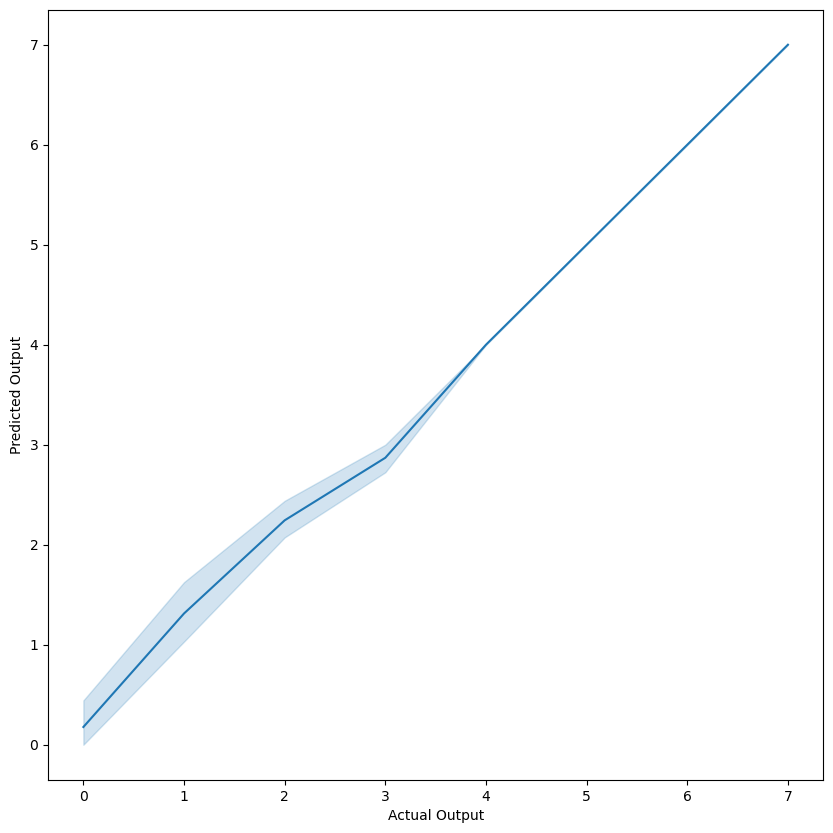

In [240]:
plt.figure(figsize=(10,10))
sns.lineplot(df,x=a,y=y_predicts)
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

The result from the lineplot shows that when the actual output increases predicted output also increase and this shows the ExtraTreesClassifier model performs better compared to other classification models.

# Regression Problem

# Prediction of capacity_mw

# Import the needed libraries for data preprocessing, model building and evaluation of regression models

In [246]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import re

# Display the first 5 records of the input dataset using head() method

In [249]:
powerplant_df.head()

name  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0     0    -1.695767   28.1839  -0.952545             6     0.057607   
1     1     0.193694   24.7663  -0.544976             1     0.057607   
2     2    -0.292337   21.9038  -2.379864             7     0.057607   
3     3     0.360998   23.8712   2.174468             2     0.057607   
4     4     1.649503   21.9603   1.117231             1     0.057607   

   commissioning_year     owner    source  geolocation_source  \
0            1.113530  1.490514  1.582861           -2.345400   
1            0.053562  1.512380  2.036658            0.396062   
2            0.053562 -1.899629 -0.471879            0.396062   
3            0.346488 -0.719375 -0.403248            0.396062   
4            1.610143 -0.719375 -0.403248            0.396062   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0             0.287071             0.311796             0.315787   
1             0.287071             0.311796             0.315787   
2             0.287071             0.311796             0.315787   
3            -0.864800            -0.579716            -0.542819   
4             0.537628             1.385476             1.427655   

   generation_gwh_2017  generation_gwh_2018  
0             0.312925             0.321938  
1             0.312925             0.321938  
2             0.312925             0.321938  
3            -0.750910            -0.771699  
4             1.180690             1.552482

# Split the data as x(input) and y(label/output)

In [252]:
x=powerplant_df.drop(columns='capacity_mw',axis=1)
x.head()

name  latitude  longitude  primary_fuel  other_fuel1  commissioning_year  \
0     0   28.1839  -0.952545             6     0.057607            1.113530   
1     1   24.7663  -0.544976             1     0.057607            0.053562   
2     2   21.9038  -2.379864             7     0.057607            0.053562   
3     3   23.8712   2.174468             2     0.057607            0.346488   
4     4   21.9603   1.117231             1     0.057607            1.610143   

      owner    source  geolocation_source  generation_gwh_2014  \
0  1.490514  1.582861           -2.345400             0.287071   
1  1.512380  2.036658            0.396062             0.287071   
2 -1.899629 -0.471879            0.396062             0.287071   
3 -0.719375 -0.403248            0.396062            -0.864800   
4 -0.719375 -0.403248            0.396062             0.537628   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             0.311796             0.315787             0.312925   
1             0.311796             0.315787             0.312925   
2             0.311796             0.315787             0.312925   
3            -0.579716            -0.542819            -0.750910   
4             1.385476             1.427655             1.180690   

   generation_gwh_2018  
0             0.321938  
1             0.321938  
2             0.321938  
3            -0.771699  
4             1.552482

In [254]:
y=powerplant_df['capacity_mw']
y.head()

0   -1.695767
1    0.193694
2   -0.292337
3    0.360998
4    1.649503
Name: capacity_mw, dtype: float64

# check for the multicollinearity in the dataset using variance inflation factor

In [257]:
def calc_vif(x):
    df=pd.DataFrame()
    df['columns']=x.columns
    df['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return df

In [259]:
calc_vif(x)

columns        VIF
0                  name   1.030876
1              latitude   1.117364
2             longitude   1.312142
3          primary_fuel   1.897085
4           other_fuel1  23.300710
5    commissioning_year   1.073603
6                 owner   2.799805
7                source   2.952177
8    geolocation_source   2.096619
9   generation_gwh_2014   4.055923
10  generation_gwh_2015   7.202333
11  generation_gwh_2016  10.593520
12  generation_gwh_2017  10.744820
13  generation_gwh_2018  10.935295

In [261]:
x=x.drop(columns='other_fuel1',axis=1)

In [263]:
calc_vif(x)

columns        VIF
0                  name   3.350579
1              latitude   4.697029
2             longitude   1.290670
3          primary_fuel   4.630263
4    commissioning_year   1.073407
5                 owner   2.800498
6                source   2.865240
7    geolocation_source   1.815504
8   generation_gwh_2014   4.061400
9   generation_gwh_2015   7.218098
10  generation_gwh_2016  10.604070
11  generation_gwh_2017  10.778208
12  generation_gwh_2018  10.957947

# Apply standardScaler method to standardize the data

In [266]:
sc=StandardScaler()
x_scalesreg=sc.fit_transform(x)
x_scaledreg=pd.DataFrame(x_scalesreg,columns=x.columns)
x_scaledreg.head()

name  latitude  longitude  primary_fuel  commissioning_year     owner  \
0 -1.720643  1.139183  -0.954360      1.212771            1.116358  1.476913   
1 -1.716815  0.580985  -0.544353     -0.977993            0.046268  1.499030   
2 -1.712987  0.113452  -2.390218      1.650923            0.046268 -1.952273   
3 -1.709159  0.434788   2.191360     -0.539840            0.341991 -0.758426   
4 -1.705331  0.122680   1.127799     -0.977993            1.617714 -0.758426   

     source  geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0  1.699221           -2.359708             0.376231             0.401195   
1  2.203444            0.393746             0.376231             0.401195   
2 -0.583842            0.393746             0.376231             0.401195   
3 -0.507585            0.393746            -0.899680            -0.584894   
4 -0.507585            0.393746             0.653769             1.588777   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0             0.401629             0.397709             0.403454  
1             0.401629             0.397709             0.403454  
2             0.401629             0.397709             0.403454  
3            -0.543360            -0.764697            -0.790519  
4             1.625360             1.345878             1.746896

# Instantiate the regression models

In [269]:
lr=LinearRegression()
knn=KNeighborsRegressor()
ls=Lasso(alpha=0.00001)
rg=Ridge(alpha=0.00001)
els=ElasticNet(alpha=0.00001)
svr=SVR()
lsvr=LinearSVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
ada=AdaBoostRegressor()
gr=GradientBoostingRegressor()
bag=BaggingRegressor()
etr=ExtraTreesRegressor()

model_names=[(lr,"Linear Regression"),
             (knn,"Knearest Neighbor Regressor"),
             (ls,"Lasso"),
             (rg,"Ridge"),
             (els,"ElasticNet"),
             (svr,"Support Vector regressor"),
             (lsvr,"LinearSVR"),
             (dtr,"DecisionTreeRegressor"),
             (rfr,"RandomForestRegressor"),
             (ada,"AdaBoostRegressor"),
             (gr,"GradientBoostingRegressor"),
             (bag,"BaggingRegressor"),
             (etr,"ExtraTreesRegressor")]

# Perform cross validation for each model to check for the best performing model

In [272]:
models=[lr,knn,ls,rg,els,svr,lsvr,dtr,rfr,ada,gr,bag,etr]

for i in models:
    cvs=cross_val_score(i,x_scaledreg,y,cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"\n Mean of the cross validation is",np.mean(cvs),"\n")

Cross validation score for LinearRegression() is [0.51879717 0.58221691 0.55807252 0.50554196 0.48235314] 
 Mean of the cross validation is 0.5293963397352419 

Cross validation score for KNeighborsRegressor() is [0.64131619 0.58340652 0.68472361 0.65391679 0.64887849] 
 Mean of the cross validation is 0.6424483205289692 

Cross validation score for Lasso(alpha=1e-05) is [0.51880991 0.58221758 0.55807175 0.50554369 0.48236082] 
 Mean of the cross validation is 0.5294007498041419 

Cross validation score for Ridge(alpha=1e-05) is [0.51879717 0.58221691 0.55807252 0.50554196 0.48235314] 
 Mean of the cross validation is 0.529396340274619 

Cross validation score for ElasticNet(alpha=1e-05) is [0.51880364 0.58221742 0.55807178 0.50554335 0.48235751] 
 Mean of the cross validation is 0.5293987426983577 

Cross validation score for SVR() is [0.64369144 0.65937721 0.69573662 0.69296865 0.64877413] 
 Mean of the cross validation is 0.6681096095677155 

Cross validation score for LinearSVR() i

# Check for the best random state and maximum accuracy for the best performing model in cross_val_score

In [275]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaledreg,y,test_size=0.30,random_state=i)
    rfr.fit(x_train,y_train)
    y_pred=rfr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accurancy score is",maxacc,"and random state is",maxrs)

Accurancy score is 0.8650425323412537 and random state is 153


In [277]:
x_train,x_test,y_train,y_test=train_test_split(x_scaledreg,y,test_size=0.30,random_state=153)

In [279]:
x_train.shape

(615, 13)

In [281]:
x_test.shape

(264, 13)

In [283]:
y_train.shape

(615,)

In [285]:
y_test.shape

(264,)

# Build and train different classification models

In [288]:
model_list=[]
for model,model_name in model_names:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    r2_train=r2_score(y_train,y_pred_train)
    r2=r2_score(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    model_perf={"Model Name":model_name,"R-Score(Training data)":r2_train,"R-Score(Test Data)":r2,"Mean Squared Error":mse,"Mean Absolute Error":mae,"Root Mean Squared Error":rmse}
    model_list.append(model_perf)
df=pd.DataFrame(model_list)
df=df.sort_values(by='R-Score(Test Data)',ascending=False)
df

Model Name  R-Score(Training data)  R-Score(Test Data)  \
8         RandomForestRegressor                0.972627            0.867186   
10    GradientBoostingRegressor                0.891620            0.854655   
11             BaggingRegressor                0.967688            0.844038   
12          ExtraTreesRegressor                1.000000            0.837414   
9             AdaBoostRegressor                0.757740            0.790145   
5      Support Vector regressor                0.734834            0.719035   
7         DecisionTreeRegressor                1.000000            0.714654   
1   Knearest Neighbor Regressor                0.734715            0.702770   
2                         Lasso                0.530241            0.556514   
4                    ElasticNet                0.530241            0.556505   
3                         Ridge                0.530241            0.556495   
0             Linear Regression                0.530241            0.556495   
6                     LinearSVR                0.480754            0.526824   

    Mean Squared Error  Mean Absolute Error  Root Mean Squared Error  
8             0.133568             0.252145                 0.365469  
10            0.146171             0.278654                 0.382323  
11            0.156847             0.276517                 0.396039  
12            0.163509             0.275026                 0.404362  
9             0.211047             0.362028                 0.459398  
5             0.282561             0.386587                 0.531564  
7             0.286966             0.382829                 0.535692  
1             0.298918             0.379426                 0.546734  
2             0.446004             0.525837                 0.667835  
4             0.446013             0.525845                 0.667842  
3             0.446023             0.525853                 0.667850  
0             0.446023             0.525853                 0.667850  
6             0.475862             0.490479                 0.689828

In [290]:
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("R-Score for test data",r2_score(y_test,y_pred))
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)))

R-Score for test data 0.8642476842388931
Mean Squared Error 0.13652300193955252
Mean Absolute Error 0.2571241218359389
Root Mean Squared Error 0.36949019193958654


# Hyperparameter tuning for the RandomForestRegressor

In [293]:
params_grids={"criterion" : ["squared_error", "absolute_error", "friedman_mse", "poisson"],"max_features" : ["sqrt", "log2", None],"bootstrap":[True,False],"oob_score":[True,False]}
params_grids

{'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'max_features': ['sqrt', 'log2', None],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [295]:
gscv1=GridSearchCV(rfr,params_grids,cv=5,n_jobs=-1)

In [297]:
gscv1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'oob_score': [True, False]})

In [299]:
gscv1.best_params_

{'bootstrap': True,
 'criterion': 'absolute_error',
 'max_features': 'log2',
 'oob_score': True}

In [301]:
rfr1=RandomForestRegressor(criterion='absolute_error',max_features='log2',bootstrap=True,oob_score=True)
rfr1.fit(x_train,y_train)
y_predrfr=rfr1.predict(x_test)
y_predrfr

array([-1.08655009e+00,  1.51645000e-01, -1.10818443e+00,  8.67021363e-01,
       -7.65093879e-01,  1.45265276e+00, -9.22293572e-01, -1.28096105e+00,
       -1.49290106e-01,  1.51708976e+00,  1.49692472e+00,  8.23700023e-01,
       -1.36761976e+00, -4.55972241e-02,  1.46649648e-01,  1.09227387e+00,
       -3.85093870e-01, -1.25831419e+00, -8.43781102e-01,  9.87947431e-03,
       -1.76673513e-01,  7.87597777e-01, -2.61783357e-01,  2.64892119e-01,
       -3.16938283e-01, -5.11086033e-01,  1.88364849e-01, -8.16618183e-01,
       -8.16779313e-02,  7.00415384e-01, -1.59858325e+00, -1.11497897e+00,
       -6.65520483e-01,  1.49584525e+00,  5.21966868e-01, -7.98868441e-01,
        4.26455931e-03, -1.13705531e+00, -4.24924934e-01,  3.53315902e-01,
        2.97325939e-01, -7.22060989e-01, -1.91084308e-01, -4.75745365e-01,
        1.51963018e+00,  6.17963675e-01, -6.47008082e-01, -3.82410396e-01,
        1.31621941e+00, -4.85010452e-01,  3.91267174e-01,  2.45323539e-01,
       -4.98731284e-01, -

In [303]:
y_pred_trainrfr=rfr1.predict(x_train)

In [305]:
y_pred_train=rfr1.predict(x_train)
print("Training data Score",r2_score(y_train,y_pred_train))
print("R-Score for test data",r2_score(y_test,y_predrfr))
print("Mean Squared Error",mean_squared_error(y_test,y_predrfr))
print("Mean Absolute Error",mean_absolute_error(y_test,y_predrfr))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_predrfr)))

Training data Score 0.969772341849888
R-Score for test data 0.8654105721034007
Mean Squared Error 0.13535351218689862
Mean Absolute Error 0.25569124709542723
Root Mean Squared Error 0.3679042160493661


The ranfomForestRegressor model performs better when compared to other regression models

# Save the best model

In [308]:
import joblib as jl

jl.dump(rfr,open('GlobalPowerPlantreg.pkl','wb'))

# Load the model

In [311]:
import joblib as jl

model=jl.load(open('GlobalPowerPlantreg.pkl','rb'))
model.predict(x_test)

array([-0.73716814,  0.02871187, -1.2261233 ,  0.93954923, -0.8362036 ,
        1.48053287, -1.05891538, -1.06925272, -0.1169501 ,  1.60399023,
        1.58069463,  0.78297562, -1.36509701, -0.00621402,  0.19363978,
        1.10686958, -0.42829671, -1.09786966, -0.94450006, -0.03224724,
       -0.11713737,  0.76788211, -0.2947357 ,  0.25698804, -0.41216506,
       -0.50966491,  0.16866856, -0.81098636, -0.09259551,  0.7994611 ,
       -1.57377669, -1.26282635, -0.65887454,  1.53297316,  0.43703771,
       -0.91944286,  0.01486907, -1.11079558, -0.50556466,  0.27593791,
        0.15378569, -0.78306888, -0.24052931, -0.65575712,  1.51041906,
        0.54025982, -0.57437621, -0.41128395,  1.34570355, -0.50525244,
        0.35485798,  0.18192539, -0.66062409, -0.43330265, -0.09243393,
        1.44500562,  0.91299857, -0.0457047 , -0.96443112, -1.56008483,
       -0.71244794, -0.12179373, -0.62631568, -1.22200517, -1.04973451,
        1.48677402, -1.12082506, -0.35136596,  1.40745041,  0.41

# Test the loaded model

In [314]:
y_tests=np.array(y_test)
df1=pd.DataFrame()
df1["Actual Output"]=y_tests
df1["Predicted Output"]=y_pred
df1

Actual Output  Predicted Output
0        -1.374565         -0.737168
1         0.234825          0.028712
2        -1.615576         -1.226123
3         0.985666          0.939549
4        -1.021146         -0.836204
..             ...               ...
259       1.501523          1.624342
260       1.691538          1.361503
261      -0.158137         -0.718183
262      -0.206857         -0.175366
263       1.246575          1.045020

[264 rows x 2 columns]

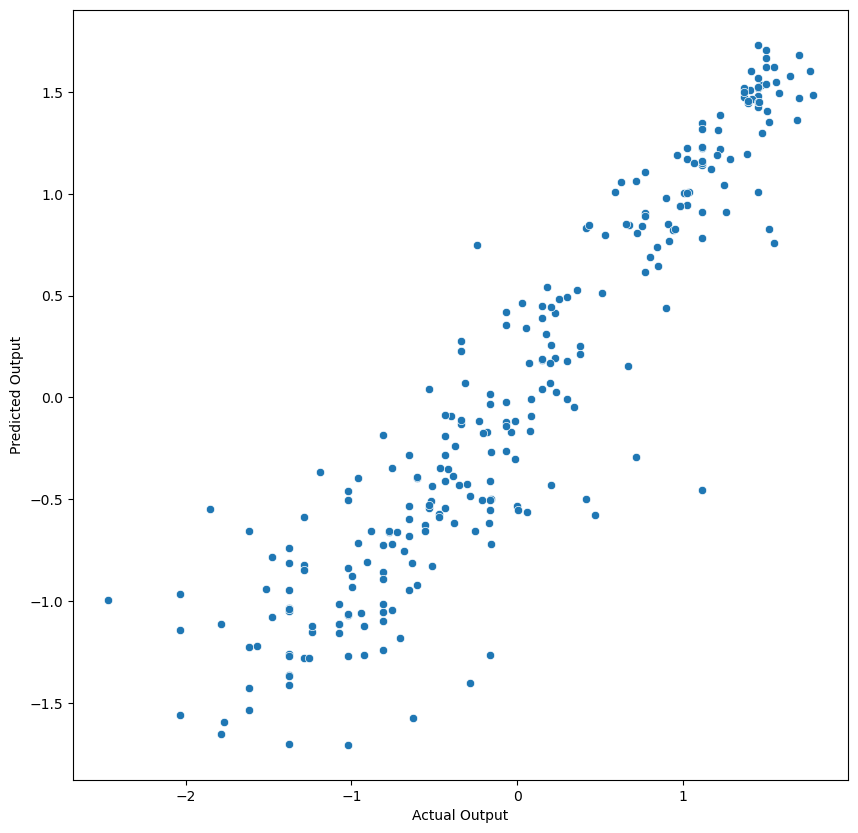

In [316]:
plt.figure(figsize=(10,10))
sns.scatterplot(df1,x=y_tests,y=y_pred)
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

The result from the scatterplot shows that when the actual output increases predicted output also increase and this shows that the RandomForestRegressor model performs better compared to other regression models.